# Importing Libraries

In [1]:
# importing libraries
import os
import glob
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1st phase cleaning

## Loading Data

In [3]:
# combining csv files
file_dir = "E:/9_Tableau_Projects/5_Dhaka_apartment_price_analysis/scraped_data/"  
output_file = "E:/9_Tableau_Projects/5_Dhaka_apartment_price_analysis/datasets/apartment_listing_combined.csv"
encoding = "utf-8-sig"  # Use 'utf-8-sig' for Bangla compatibility

# Combining CSVs
csv_files = glob.glob(os.path.join(file_dir, "*.csv"))

dfs = []
for file_path in csv_files:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        dfs.append(df)
        print(f"Loaded: {os.path.basename(file_path)}")
    except Exception as e:
        print(f"Failed to load {file_path}: {e}")

# Export combined CSV
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df.to_csv(output_file, index=False, encoding=encoding)
    print(f"Combined CSV saved to: {output_file}")
else:
    print("No CSV files found or loaded.")


Loaded: apartment_listing_1_page_1_to_5.csv
Loaded: apartment_listing_2_page_6_to_10.csv
Loaded: apartment_listing_3_page_11_to_20.csv
Loaded: apartment_listing_4_page_21_to_30.csv
Loaded: apartment_listing_5_page_31_to_35.csv
Combined CSV saved to: E:/9_Tableau_Projects/5_Dhaka_apartment_price_analysis/datasets/apartment_listing_combined.csv


In [ ]:
# loading data

# Use encoding="utf-8-sig" to get bangla characters if they don't shows in df
df = pd.read_csv("E:/9_Tableau_Projects/5_Dhaka_apartment_price_analysis/datasets/apartment_listing_combined.csv")
df.head(5)

,Page,Title,Feature,Link,Total Price,Price per Sqft,Address,Bedrooms,Bathrooms,Size (sqft),Owner,Owner Type,Listing Date,Premium Project,Property_summary_dict,Property_features_dict
0,1,"1800 sqft, 3 Beds Under Construction Flats for...",FEATURED,https://www.bdhousing.com/details/242288/1800-...,CALL FOR NET PRICE,NaN,"Shyamoli, Dhaka",3,3,1800,Anwar Landmark Ltd,Real Estate Company,|2025-08-16 04:49:18,Premium Developer Project,{'Property Name': 'Anwar Landmark Hossain Hous...,"{'Mosque/Prayer Room': 1, 'Security': 1, 'Lift..."
1,1,"RYAN'S SALMA NOOR PALACE, KAMARPARA, Uttara",FEATURED,https://www.bdhousing.com/details/249924/under...,CALL FOR NET PRICE,NaN,"Uttara, Dhaka",3,3,1696,Ryan Property LTD,Real Estate Company,|2025-08-15 23:29:54,Premium Developer Project,"{'Property Name': ""Ryan's Salma Noor Palace"", ...","{'Security': 1, 'Lift': 1, 'WASA connection': ..."
2,1,"1691 sqft, 3 Beds Under Construction Apartment...",NaN,https://www.bdhousing.com/details/243767/1691-...,CALL FOR NET PRICE,NaN,"Shantinagar, Dhaka",3,4,1691,Ag property developments ltd,Real Estate Company,|2025-08-16 05:24:37,Premium Developer Project,{'Property Name': 'Apan Angina Rabia Rahman Ga...,"{'Mosque/Prayer Room': 1, 'Security': 1, 'Lift..."
3,1,"2150 sqft, 3 Beds Flats for Sale at DOHS Road,...",NaN,https://www.bdhousing.com/details/245777/2150-...,CALL FOR NET PRICE,NaN,"Mirpur DOHS, Dhaka",3,3,2150,Anwar Landmark Ltd,Real Estate Company,|2025-08-16 04:25:46,Premium Developer Project,"{'Property Name': 'Anwar Landmark Neelkantho',...","{'Mosque/Prayer Room': 1, 'Security': 1, 'Lift..."
4,1,"2000 sqft, 4 Beds Under Construction Apartment...",NaN,https://www.bdhousing.com/details/247334/4-bed...,CALL FOR NET PRICE,NaN,"Pallabi, Dhaka",4,4,2000,Hyperion Design & Development Ltd.,Real Estate Company,|2025-08-16 02:53:20,Premium Developer Project,"{'Property Name': 'Hyperion Chayapallab', 'Pro...","{'Security': 1, 'Lift': 1, 'Fire exit': 1, 'WA..."


In [4]:
df.columns

Index(['Page', 'Title', 'Feature', 'Link', 'Total Price', 'Price per Sqft',
       'Address', 'Bedrooms', 'Bathrooms', 'Size (sqft)', 'Owner',
       'Owner Type', 'Listing Date', 'Premium Project',
       'Property_summary_dict', 'Property_features_dict'],
      dtype='object')

In [5]:
df_master_copy = df.copy(deep=True)
df_master_copy.head()

,Page,Title,Feature,Link,Total Price,Price per Sqft,Address,Bedrooms,Bathrooms,Size (sqft),Owner,Owner Type,Listing Date,Premium Project,Property_summary_dict,Property_features_dict
0,1,"1800 sqft, 3 Beds Under Construction Flats for...",FEATURED,https://www.bdhousing.com/details/242288/1800-...,CALL FOR NET PRICE,NaN,"Shyamoli, Dhaka",3,3,1800,Anwar Landmark Ltd,Real Estate Company,|2025-08-16 04:49:18,Premium Developer Project,{'Property Name': 'Anwar Landmark Hossain Hous...,"{'Mosque/Prayer Room': 1, 'Security': 1, 'Lift..."
1,1,"RYAN'S SALMA NOOR PALACE, KAMARPARA, Uttara",FEATURED,https://www.bdhousing.com/details/249924/under...,CALL FOR NET PRICE,NaN,"Uttara, Dhaka",3,3,1696,Ryan Property LTD,Real Estate Company,|2025-08-15 23:29:54,Premium Developer Project,"{'Property Name': ""Ryan's Salma Noor Palace"", ...","{'Security': 1, 'Lift': 1, 'WASA connection': ..."
2,1,"1691 sqft, 3 Beds Under Construction Apartment...",NaN,https://www.bdhousing.com/details/243767/1691-...,CALL FOR NET PRICE,NaN,"Shantinagar, Dhaka",3,4,1691,Ag property developments ltd,Real Estate Company,|2025-08-16 05:24:37,Premium Developer Project,{'Property Name': 'Apan Angina Rabia Rahman Ga...,"{'Mosque/Prayer Room': 1, 'Security': 1, 'Lift..."
3,1,"2150 sqft, 3 Beds Flats for Sale at DOHS Road,...",NaN,https://www.bdhousing.com/details/245777/2150-...,CALL FOR NET PRICE,NaN,"Mirpur DOHS, Dhaka",3,3,2150,Anwar Landmark Ltd,Real Estate Company,|2025-08-16 04:25:46,Premium Developer Project,"{'Property Name': 'Anwar Landmark Neelkantho',...","{'Mosque/Prayer Room': 1, 'Security': 1, 'Lift..."
4,1,"2000 sqft, 4 Beds Under Construction Apartment...",NaN,https://www.bdhousing.com/details/247334/4-bed...,CALL FOR NET PRICE,NaN,"Pallabi, Dhaka",4,4,2000,Hyperion Design & Development Ltd.,Real Estate Company,|2025-08-16 02:53:20,Premium Developer Project,"{'Property Name': 'Hyperion Chayapallab', 'Pro...","{'Security': 1, 'Lift': 1, 'Fire exit': 1, 'WA..."


In [6]:
df.dtypes

Page                       int64
Title                     object
Feature                   object
Link                      object
Total Price               object
Price per Sqft            object
Address                   object
Bedrooms                   int64
Bathrooms                  int64
Size (sqft)                int64
Owner                     object
Owner Type                object
Listing Date              object
Premium Project           object
Property_summary_dict     object
Property_features_dict    object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Page                    866 non-null    int64 
 1   Title                   866 non-null    object
 2   Feature                 61 non-null     object
 3   Link                    866 non-null    object
 4   Total Price             866 non-null    object
 5   Price per Sqft          388 non-null    object
 6   Address                 866 non-null    object
 7   Bedrooms                866 non-null    int64 
 8   Bathrooms               866 non-null    int64 
 9   Size (sqft)             866 non-null    int64 
 10  Owner                   865 non-null    object
 11  Owner Type              866 non-null    object
 12  Listing Date            866 non-null    object
 13  Premium Project         775 non-null    object
 14  Property_summary_dict   866 non-null    object
 15  Proper

## Finding duplicates

In [8]:
# Find all duplicate rows
duplicates = df[df.duplicated()]

# Preview duplicates
print(f"Found {len(duplicates)} duplicate rows:")
print(duplicates.head())

🔁 Found 0 duplicate rows:
Empty DataFrame
Columns: [Page, Title, Feature, Link, Total Price, Price per Sqft, Address, Bedrooms, Bathrooms, Size (sqft), Owner, Owner Type, Listing Date, Premium Project, Property_summary_dict, Property_features_dict]
Index: []


In [9]:
# Check duplicates based on specific columns
# Example: Check duplicates based on 'Title' and 'Link'
duplicates = df[df.duplicated(subset=['Title', 'Link'])]
# # Preview duplicates
# print(f"Found {len(duplicates)} duplicate rows:")
# print(duplicates.head())
duplicates

,Page,Title,Feature,Link,Total Price,Price per Sqft,Address,Bedrooms,Bathrooms,Size (sqft),Owner,Owner Type,Listing Date,Premium Project,Property_summary_dict,Property_features_dict
751,31,"1200 sqft, 3 Beds Ready Apartment/Flats for Sa...",NaN,https://www.bdhousing.com/details/247286/1200-...,CALL FOR NET PRICE,NaN,"Adabor, Dhaka",3,3,1200,Mamun Chowdhury,Property owner,|2025-05-07 14:56:10,Premium Developer Project,"{'Property Name': 'Grihoshoilee shamol chaya',...","{'Mosque/Prayer Room': 1, 'Security': 1, 'Lift..."
752,31,"1365 sqft, 3 Beds Almost Ready Apartment/Flats...",NaN,https://www.bdhousing.com/details/243672/1365-...,CALL FOR NET PRICE,NaN,"Adabor, Dhaka",3,2,1365,K.M. JAKARIA,Property owner,|2025-05-06 13:37:57,Premium Developer Project,"{'Property Name': 'Luminous Shibly Garden', 'P...","{'Security': 1, 'Lift': 1, 'Fire exit': 1, 'WA..."
753,31,Flat for Sale Vatara,NaN,https://www.bdhousing.com/details/246293/flat-...,4.60 CR./TOTAL,"40,000 /sqft","Vatara, Dhaka",3,2,1150,Mahmudul hasan,Property owner,|2025-05-06 12:06:54,Premium Developer Project,"{'Property Name': 'Flat for Sale', 'Property T...","{'Mosque/Prayer Room': 1, 'Lift': 1, 'WASA con..."


In [10]:
duplicates["Link"]

751    https://www.bdhousing.com/details/247286/1200-...
752    https://www.bdhousing.com/details/243672/1365-...
753    https://www.bdhousing.com/details/246293/flat-...
Name: Link, dtype: object

In [11]:
# Shows all duplicates including the first instance
all_dupes = df[df.duplicated(keep=False)]
all_dupes

,Page,Title,Feature,Link,Total Price,Price per Sqft,Address,Bedrooms,Bathrooms,Size (sqft),Owner,Owner Type,Listing Date,Premium Project,Property_summary_dict,Property_features_dict


In [ ]:
# Removes duplicate rows, keeping the first occurrence
# deduped_df = combined_df.drop_duplicates()

## Data Transformation

In [12]:
# drop one column
df = df.drop("Page", axis=1)
# drop multiple column
# df = df.drop(["col1", "col2"], axis=1)
df.head()

,Title,Feature,Link,Total Price,Price per Sqft,Address,Bedrooms,Bathrooms,Size (sqft),Owner,Owner Type,Listing Date,Premium Project,Property_summary_dict,Property_features_dict
0,"1800 sqft, 3 Beds Under Construction Flats for...",FEATURED,https://www.bdhousing.com/details/242288/1800-...,CALL FOR NET PRICE,NaN,"Shyamoli, Dhaka",3,3,1800,Anwar Landmark Ltd,Real Estate Company,|2025-08-16 04:49:18,Premium Developer Project,{'Property Name': 'Anwar Landmark Hossain Hous...,"{'Mosque/Prayer Room': 1, 'Security': 1, 'Lift..."
1,"RYAN'S SALMA NOOR PALACE, KAMARPARA, Uttara",FEATURED,https://www.bdhousing.com/details/249924/under...,CALL FOR NET PRICE,NaN,"Uttara, Dhaka",3,3,1696,Ryan Property LTD,Real Estate Company,|2025-08-15 23:29:54,Premium Developer Project,"{'Property Name': ""Ryan's Salma Noor Palace"", ...","{'Security': 1, 'Lift': 1, 'WASA connection': ..."
2,"1691 sqft, 3 Beds Under Construction Apartment...",NaN,https://www.bdhousing.com/details/243767/1691-...,CALL FOR NET PRICE,NaN,"Shantinagar, Dhaka",3,4,1691,Ag property developments ltd,Real Estate Company,|2025-08-16 05:24:37,Premium Developer Project,{'Property Name': 'Apan Angina Rabia Rahman Ga...,"{'Mosque/Prayer Room': 1, 'Security': 1, 'Lift..."
3,"2150 sqft, 3 Beds Flats for Sale at DOHS Road,...",NaN,https://www.bdhousing.com/details/245777/2150-...,CALL FOR NET PRICE,NaN,"Mirpur DOHS, Dhaka",3,3,2150,Anwar Landmark Ltd,Real Estate Company,|2025-08-16 04:25:46,Premium Developer Project,"{'Property Name': 'Anwar Landmark Neelkantho',...","{'Mosque/Prayer Room': 1, 'Security': 1, 'Lift..."
4,"2000 sqft, 4 Beds Under Construction Apartment...",NaN,https://www.bdhousing.com/details/247334/4-bed...,CALL FOR NET PRICE,NaN,"Pallabi, Dhaka",4,4,2000,Hyperion Design & Development Ltd.,Real Estate Company,|2025-08-16 02:53:20,Premium Developer Project,"{'Property Name': 'Hyperion Chayapallab', 'Pro...","{'Security': 1, 'Lift': 1, 'Fire exit': 1, 'WA..."


In [13]:
# to keep track of all dropped columns, making a list
dropped_col = []
dropped_col.append("Page")
print(dropped_col) 

['Page']


In [14]:
# feature column transformation
unique_vals = df["Feature"].unique()
print(unique_vals)

['FEATURED' nan]


In [15]:
count = df["Feature"].nunique(dropna=True)
print("Unique count:", count)

Unique count: 1


In [16]:
value_counts = df["Feature"].value_counts(dropna=False)
print(value_counts)

Feature
NaN         805
FEATURED     61
Name: count, dtype: int64


In [17]:
# alternative, works slower
# df"Feature"] = df["Feature"].apply(lambda x: 1 if x == "FEATURED" else 0)

# works faster
df["Feature"] = np.where(df["Feature"] == "FEATURED", 1, 0)

In [18]:
print(df["Feature"].value_counts())

Feature
0    805
1     61
Name: count, dtype: int64


In [19]:
df.dtypes

Title                     object
Feature                    int64
Link                      object
Total Price               object
Price per Sqft            object
Address                   object
Bedrooms                   int64
Bathrooms                  int64
Size (sqft)                int64
Owner                     object
Owner Type                object
Listing Date              object
Premium Project           object
Property_summary_dict     object
Property_features_dict    object
dtype: object

In [20]:
# Reordering columns which are done transformation
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index("Feature")))
df = df[cols]
print(df.columns)

Index(['Feature', 'Title', 'Link', 'Total Price', 'Price per Sqft', 'Address',
       'Bedrooms', 'Bathrooms', 'Size (sqft)', 'Owner', 'Owner Type',
       'Listing Date', 'Premium Project', 'Property_summary_dict',
       'Property_features_dict'],
      dtype='object')


In [21]:
# to keep track of all transformed columns, making a list
transformed_col = []
transformed_col.append("Feature")
print(transformed_col) 

['Feature']


In [22]:
# changing column name
df = df.rename(columns={"Price per Sqft":"Price per Sqft (BDT)", "Total Price": "Total Price (BDT)"})
df.columns

Index(['Feature', 'Title', 'Link', 'Total Price (BDT)', 'Price per Sqft (BDT)',
       'Address', 'Bedrooms', 'Bathrooms', 'Size (sqft)', 'Owner',
       'Owner Type', 'Listing Date', 'Premium Project',
       'Property_summary_dict', 'Property_features_dict'],
      dtype='object')

In [ ]:
# transformation of column 'Price per Sqft (BDT)'
# removing /sqft and trim whitespace
# .replace("/sqft", "") → removes the suffix
# .strip() → trims leading/trailing whitespace
# pd.notna(x) → skips NaN rows safely

# df["Price per Sqft (BDT)"] = df["Price per Sqft (BDT)"].apply(
#     lambda x: str(x).replace("/sqft", "").strip() if pd.notna(x) else x
# )

In [ ]:
# - Removes /sqft
# - Converts "Lac" and "Crore" to numeric values (in BDT)
# - Handles missing or malformed entries gracefully
def convert_price(value):
    if pd.isna(value):
        # return None
        return np.nan
    value = str(value).replace("/sqft", "").strip()
    
    if "Lac" in value:
        try:
            return float(value.replace("Lac", "").strip()) * 1e5
        except:
            return value
    elif "Crore" in value:
        try:
            return float(value.replace("Crore", "").strip()) * 1e7
        except:
            return value
    else:
        try:
            return float(value)
        except:
            return value

# Apply conversion
df["Price per Sqft (BDT)"] = df["Price per Sqft (BDT)"].apply(convert_price)
df["Price per Sqft (BDT)"] = df["Price per Sqft (BDT)"].apply(lambda x: float(str(x).replace(",", "").strip()) if pd.notna(x) else None)

In [42]:
# Convert None to np.nan
# This ensures consistency for CSV export and Tableau use. 
df['Price per Sqft (BDT)'] = df['Price per Sqft (BDT)'].apply(lambda x: np.nan if x is None else x)

In [ ]:
# Check Type of Missing Value
# will show nan if np.nan is present, and None if it's a Python None.
print(df['Price per Sqft (BDT)'].unique())

In [43]:
df[["Price per Sqft (BDT)"]].value_counts(dropna=False)

Price per Sqft (BDT)
NaN                     478
7500.0                   22
10000.0                  21
6000.0                   19
9500.0                   17
                       ... 
25000.0                   1
50000.0                   1
799000.0                  1
1300000.0                 1
7500000.0                 1
Name: count, Length: 125, dtype: int64

In [25]:
# Reordering columns which are done transformation
# Remove the column
col = df.pop("Price per Sqft (BDT)")
# Insert it at index 1 (second position)
df.insert(1, "Price per Sqft (BDT)", col)
print(df.columns)

Index(['Feature', 'Price per Sqft (BDT)', 'Title', 'Link', 'Total Price (BDT)',
       'Address', 'Bedrooms', 'Bathrooms', 'Size (sqft)', 'Owner',
       'Owner Type', 'Listing Date', 'Premium Project',
       'Property_summary_dict', 'Property_features_dict'],
      dtype='object')


In [26]:
transformed_col.append("Price per Sqft (BDT)")
transformed_col

['Feature', 'Price per Sqft (BDT)']

In [27]:
# transformation of column Listing Date
df["Listing Date"] = df["Listing Date"].apply(
    lambda x: str(x).lstrip("|").split(" ")[0] if pd.notna(x) else x
)

# If finding a value that can’t be converted to a valid datetime, don’t crash—just replace it with NaT (Not a Time)
# df["Listing Date"] = pd.to_datetime(df["Listing Date"], errors="coerce").dt.date
df["Listing Date"] = pd.to_datetime(df["Listing Date"], errors="coerce")

In [28]:
df["Listing Date"].value_counts(dropna=False)

Listing Date
2025-07-24    61
2025-08-14    55
2025-04-12    38
2025-05-29    31
2025-08-10    28
              ..
2025-01-08     1
2024-07-25     1
2024-07-10     1
2024-06-30     1
2024-05-09     1
Name: count, Length: 153, dtype: int64

In [29]:
# Reordering columns which are done transformation
# Remove the column
col = df.pop("Listing Date")
# Insert it at index 1 (second position)
df.insert(2, "Listing Date", col)
print(df.columns)
transformed_col.append("Listing Date")
transformed_col

Index(['Feature', 'Price per Sqft (BDT)', 'Listing Date', 'Title', 'Link',
       'Total Price (BDT)', 'Address', 'Bedrooms', 'Bathrooms', 'Size (sqft)',
       'Owner', 'Owner Type', 'Premium Project', 'Property_summary_dict',
       'Property_features_dict'],
      dtype='object')


['Feature', 'Price per Sqft (BDT)', 'Listing Date']

In [30]:
# transformation of column 'Premium Project'
df['Premium Project'] = np.where(df["Premium Project"] == "Premium Developer Project", 1, 0)

In [31]:
value_counts = df['Premium Project'].value_counts(dropna=False)
print(value_counts)

Premium Project
1    775
0     91
Name: count, dtype: int64


In [32]:
# Remove the column
col = df.pop("Premium Project")
# Insert it at index 1 (second position)
df.insert(2, "Premium Project", col)
print(df.columns)
transformed_col.append("Premium Project")
transformed_col

Index(['Feature', 'Price per Sqft (BDT)', 'Premium Project', 'Listing Date',
       'Title', 'Link', 'Total Price (BDT)', 'Address', 'Bedrooms',
       'Bathrooms', 'Size (sqft)', 'Owner', 'Owner Type',
       'Property_summary_dict', 'Property_features_dict'],
      dtype='object')


['Feature', 'Price per Sqft (BDT)', 'Listing Date', 'Premium Project4']

In [36]:
transformed_col.append("Premium Project")
transformed_col

['Feature', 'Price per Sqft (BDT)', 'Listing Date', 'Premium Project']

In [38]:
# value_counts = df['Bedrooms'].value_counts(dropna=False)
value_counts = df['Bathrooms'].value_counts(dropna=False)
print(value_counts)

Bathrooms
3    478
4    193
2     91
5     80
1     17
6      7
Name: count, dtype: int64


In [39]:
# Remove the column
col = df.pop("Bedrooms")
# Insert it at index 1 (second position)
df.insert(3, "Bedrooms", col)
print(df.columns)
transformed_col.append("Bedrooms")
transformed_col

Index(['Feature', 'Price per Sqft (BDT)', 'Premium Project', 'Bedrooms',
       'Listing Date', 'Title', 'Link', 'Total Price (BDT)', 'Address',
       'Bathrooms', 'Size (sqft)', 'Owner', 'Owner Type',
       'Property_summary_dict', 'Property_features_dict'],
      dtype='object')


['Feature',
 'Price per Sqft (BDT)',
 'Listing Date',
 'Premium Project',
 'Bedrooms']

In [40]:
# Remove the column
col = df.pop("Bathrooms")
# Insert it at index 1 (second position)
df.insert(4, "Bathrooms", col)
print(df.columns)
transformed_col.append("Bathrooms")
transformed_col

Index(['Feature', 'Price per Sqft (BDT)', 'Premium Project', 'Bedrooms',
       'Bathrooms', 'Listing Date', 'Title', 'Link', 'Total Price (BDT)',
       'Address', 'Size (sqft)', 'Owner', 'Owner Type',
       'Property_summary_dict', 'Property_features_dict'],
      dtype='object')


['Feature',
 'Price per Sqft (BDT)',
 'Listing Date',
 'Premium Project',
 'Bedrooms',
 'Bathrooms']

In [ ]:
# transformation of Total Price (BDT)
def convert_price(value):
    if pd.isna(value):
        return np.nan
    # value = str(value).replace("/sqft", "").strip()
    value = str(value).strip().upper()  # Normalize casing and whitespace
    
    if "CALL FOR NET PRICE" in value:
        return np.nan

    if "LAC" in value:
        try:
            return float(value.replace("LAC/TOTAL", "").strip()) * 1e5
        except:
            return value
    elif "CR" in value:
        try:
            return float(value.replace("CR./TOTAL", "").strip()) * 1e7
        except:
            return value
    else:
        try:
            return float(value.replace(",", "").replace("BDT", "").strip())
        except ValueError:
            return np.nan


# Apply conversion
df["Total Price (BDT)"] = df["Total Price (BDT)"].apply(convert_price)
df["Total Price (BDT)"] = df["Total Price (BDT)"].apply(lambda x: float(str(x).replace(",", "").strip()) if pd.notna(x) else np.nan)

In [47]:
value_counts = df['Total Price (BDT)'].value_counts(dropna=False)
print(value_counts)

Total Price (BDT)
NaN           490
12000000.0      6
10600000.0      4
14400000.0      4
15000000.0      4
             ... 
5520000.0       1
3600000.0       1
6490000.0       1
8710000.0       1
11400000.0      1
Name: count, Length: 292, dtype: int64


In [ ]:
print(df['Price per Sqft (BDT)'].unique())

In [48]:
# Remove the column
col = df.pop("Total Price (BDT)")
# Insert it at index 1 (second position)
df.insert(2, "Total Price (BDT)", col)
print(df.columns)
transformed_col.append("Total Price (BDT)")
transformed_col

Index(['Feature', 'Price per Sqft (BDT)', 'Total Price (BDT)',
       'Premium Project', 'Bedrooms', 'Bathrooms', 'Listing Date', 'Title',
       'Link', 'Address', 'Size (sqft)', 'Owner', 'Owner Type',
       'Property_summary_dict', 'Property_features_dict'],
      dtype='object')


['Feature',
 'Price per Sqft (BDT)',
 'Listing Date',
 'Premium Project',
 'Bedrooms',
 'Bathrooms',
 'Total Price (BDT)']

In [52]:
value_counts = df['Size (sqft)'].value_counts(dropna=False)
print(value_counts)

Size (sqft)
2850    37
1200    23
1500    22
1350    22
1600    20
        ..
4200     1
2575     1
747      1
2220     1
1691     1
Name: count, Length: 364, dtype: int64


In [53]:
# Remove the column
col = df.pop("Size (sqft)")
# Insert it at index 1 (second position)
df.insert(1, "Size (sqft)", col)
print(df.columns)
transformed_col.append("Size (sqft)")
transformed_col

Index(['Feature', 'Size (sqft)', 'Price per Sqft (BDT)', 'Total Price (BDT)',
       'Premium Project', 'Bedrooms', 'Bathrooms', 'Listing Date', 'Title',
       'Link', 'Address', 'Owner', 'Owner Type', 'Property_summary_dict',
       'Property_features_dict'],
      dtype='object')


['Feature',
 'Price per Sqft (BDT)',
 'Listing Date',
 'Premium Project',
 'Bedrooms',
 'Bathrooms',
 'Total Price (BDT)',
 'Size (sqft)']

In [74]:
print("before")
print(df['Property_summary_dict'].apply(type).value_counts())

import ast

def safe_eval(x):
    try:
        return ast.literal_eval(x)
    except Exception as e:
        print(f"Failed to parse: {x}\nError: {e}")
        return {}
    
df['Property_summary_dict'] = df['Property_summary_dict'].apply(safe_eval)

# after running above code block, str changes to dict
print("after")
print(df['Property_summary_dict'].apply(type).value_counts())

before
Property_summary_dict
<class 'str'>    866
Name: count, dtype: int64
after
Property_summary_dict
<class 'dict'>    866
Name: count, dtype: int64


In [75]:
# adding new rows
# Step 1: Create a set of all unique keys across all rows
all_keys = set()
for row in df['Property_summary_dict']:
    all_keys.update(row.keys())

# Step 2: Add missing columns with default None
for key in all_keys:
    if key not in df.columns:
        df[key] = None

# Step 3: Fill in values from each dictionary
for idx, row_dict in df['Property_summary_dict'].items():
    for key, value in row_dict.items():
        df.at[idx, key] = value

In [77]:
df.drop(columns='Property_summary_dict', inplace=True)

In [81]:
dropped_col.append("Property_summary_dict")
dropped_col

['Page', 'Property_summary_dict']

In [92]:
df['Baths'] = (
    df['Baths']
    .astype(str)
    .str.lstrip('0')
    .replace('', '0')
    .replace('None', '0')  # if 'None' is a string
    .fillna('0')           # if None is actual NaN
    .astype(int)
)

In [93]:
df['match'] = df['Bathrooms'] == df['Baths']

In [100]:
# Temporarily Show All Rows
# Set display option
pd.set_option('display.max_rows', None)
# Show entire DataFrame
# print(df[["match","Bathrooms","Baths"]])
print(df[["Balconies"]])
# Reset After Viewing
pd.reset_option('display.max_rows')

     Balconies
0            3
1            3
2            4
3            3
4            3
5            3
6            6
7            2
8            3
9            4
10           2
11           2
12           2
13           2
14           2
15           3
16           0
17           3
18           2
19           3
20           2
21           4
22           3
23           3
24           2
25           3
26           3
27           4
28           2
29           2
30           2
31           3
32           3
33           3
34           3
35           4
36           3
37           0
38           3
39           0
40           2
41           3
42           2
43           4
44           3
45           4
46           3
47           3
48           3
49           4
50           3
51           3
52           4
53           3
54           4
55           3
56           4
57           2
58           3
59           2
60           3
61           4
62           2
63           3
64           3
65        

In [95]:
df.drop(columns=['match','Baths'], inplace=True)

In [99]:
# transforming Balconies
df['Balconies'] = (
    df['Balconies']
    .astype(str)
    .str.lstrip('0')
    .replace('', '0')
    .replace('None', '0')  # if 'None' is a string
    .fillna('0')           # if None is actual NaN
    .astype(int)
)

In [102]:
# Remove the column
col = df.pop("Balconies")
# Insert it at index 1 (second position)
df.insert(7, "Balconies", col)
print(df.columns)
transformed_col.append("Balconies")
transformed_col

Index(['Feature', 'Size (sqft)', 'Price per Sqft (BDT)', 'Total Price (BDT)',
       'Premium Project', 'Bedrooms', 'Bathrooms', 'Balconies', 'Listing Date',
       'Title', 'Link', 'Address', 'Owner', 'Owner Type',
       'Property_features_dict', 'Floor Avaiable On', 'Total Floor',
       'Property For', 'Property Type', 'Facing', 'Property Size',
       'Transaction Type', 'Property Name', 'Garages', 'Land Area',
       'Construction Status', 'Furnishing', 'Location'],
      dtype='object')


['Feature',
 'Price per Sqft (BDT)',
 'Listing Date',
 'Premium Project',
 'Bedrooms',
 'Bathrooms',
 'Total Price (BDT)',
 'Size (sqft)',
 'Balconies']

In [107]:
# transforming facing
value_counts = df['Facing'].value_counts(dropna=False)
print(value_counts)

Facing
South Facing    389
North Facing    227
East Facing      90
NaN              80
West Facing      80
Name: count, dtype: int64


In [106]:
# Even for object-type columns, using np.nan ensures:
# - CSV export: The cell will be empty, not "None" or "nan" as a string.
# - Tableau: Tableau will interpret the empty cell as a null, which is perfect for filtering, aggregating, or visualizing

# - pd.isna(x) catches native None, np.nan, and pd.NaT
# - str(x).strip().lower() normalizes strings like ' None ' or 'N/A'
# - Replaces all of them with np.nan, which exports cleanly to CSV and is recognized as null in Tableau

df['Facing'] = df['Facing'].apply(
    lambda x: np.nan if pd.isna(x) or str(x).strip().lower() in ['none', 'nan', 'n/a', ''] else x
)


In [110]:
# Remove the column
col = df.pop("Facing")
# Insert it at index 1 (second position)
df.insert(8, "Facing", col)
print(df.columns)
transformed_col.append("Facing")
transformed_col


Index(['Feature', 'Size (sqft)', 'Price per Sqft (BDT)', 'Total Price (BDT)',
       'Premium Project', 'Bedrooms', 'Bathrooms', 'Balconies', 'Facing',
       'Listing Date', 'Title', 'Link', 'Address', 'Owner', 'Owner Type',
       'Property_features_dict', 'Floor Avaiable On', 'Total Floor',
       'Property For', 'Property Type', 'Property Size', 'Transaction Type',
       'Property Name', 'Garages', 'Land Area', 'Construction Status',
       'Furnishing', 'Location'],
      dtype='object')


['Feature',
 'Price per Sqft (BDT)',
 'Listing Date',
 'Premium Project',
 'Bedrooms',
 'Bathrooms',
 'Total Price (BDT)',
 'Size (sqft)',
 'Balconies',
 'Facing']

In [111]:
df.columns

Index(['Feature', 'Size (sqft)', 'Price per Sqft (BDT)', 'Total Price (BDT)',
       'Premium Project', 'Bedrooms', 'Bathrooms', 'Balconies', 'Facing',
       'Listing Date', 'Title', 'Link', 'Address', 'Owner', 'Owner Type',
       'Property_features_dict', 'Floor Avaiable On', 'Total Floor',
       'Property For', 'Property Type', 'Property Size', 'Transaction Type',
       'Property Name', 'Garages', 'Land Area', 'Construction Status',
       'Furnishing', 'Location'],
      dtype='object')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Feature                 866 non-null    int64         
 1   Size (sqft)             866 non-null    int64         
 2   Price per Sqft (BDT)    388 non-null    float64       
 3   Total Price (BDT)       376 non-null    float64       
 4   Premium Project         866 non-null    int64         
 5   Bedrooms                866 non-null    int64         
 6   Bathrooms               866 non-null    int64         
 7   Balconies               866 non-null    int64         
 8   Facing                  786 non-null    object        
 9   Listing Date            866 non-null    datetime64[ns]
 10  Title                   866 non-null    object        
 11  Link                    866 non-null    object        
 12  Address                 866 non-null    object    

In [ ]:
df.to_csv("E:/9_Tableau_Projects/5_Dhaka_apartment_price_analysis/datasets/apartment_listing_cleaned_data_1.csv", index=False)

In [ ]:
##################################################################################################################################

# 2nd phase cleaning

In [8]:
# Use encoding="utf-8-sig" to get bangla characters if they don't shows in df
df = pd.read_csv("E:/9_Tableau_Projects/5_Dhaka_apartment_price_analysis/datasets/apartment_listing_cleaned_data_1.csv")
# df.head(5)

In [9]:
dropped_col = ['Page', 'Property_summary_dict']
transformed_col = ['Feature', 'Price per Sqft (BDT)', 'Listing Date', 'Premium Project', 'Bedrooms', 'Bathrooms', 'Total Price (BDT)', 'Size (sqft)', 'Balconies', 'Facing']
print(dropped_col)
print(transformed_col)

['Page', 'Property_summary_dict']
['Feature', 'Price per Sqft (BDT)', 'Listing Date', 'Premium Project', 'Bedrooms', 'Bathrooms', 'Total Price (BDT)', 'Size (sqft)', 'Balconies', 'Facing']


In [10]:
# transformation of Total Floor
df['Total Floor'] = (
    pd.to_numeric(df['Total Floor'], errors='coerce')  # Converts bad values to NaN
    .fillna(0)                                         # Replace NaN with 0
    .astype(int)                                       # Final conversion to int
)


In [11]:
value_counts = df["Total Floor"].value_counts(dropna=False)
print(value_counts)

Total Floor
9     206
8     154
10    105
7      79
6      64
0      55
5      25
14     24
1      22
11     21
12     19
16     18
13     17
4      17
2      16
3      10
15      6
18      5
17      2
20      1
Name: count, dtype: int64


In [12]:
# Remove the column
col = df.pop("Total Floor")
# Insert it at index 1 (second position)
df.insert(9, "Total Floor", col)
print(df.columns)
transformed_col.append("Total Floor")
transformed_col

Index(['Feature', 'Size (sqft)', 'Price per Sqft (BDT)', 'Total Price (BDT)',
       'Premium Project', 'Bedrooms', 'Bathrooms', 'Balconies', 'Facing',
       'Total Floor', 'Listing Date', 'Title', 'Link', 'Address', 'Owner',
       'Owner Type', 'Property_features_dict', 'Floor Avaiable On',
       'Property For', 'Property Type', 'Property Size', 'Transaction Type',
       'Property Name', 'Garages', 'Land Area', 'Construction Status',
       'Furnishing', 'Location'],
      dtype='object')


['Feature',
 'Price per Sqft (BDT)',
 'Listing Date',
 'Premium Project',
 'Bedrooms',
 'Bathrooms',
 'Total Price (BDT)',
 'Size (sqft)',
 'Balconies',
 'Facing',
 'Total Floor']

In [13]:
value_counts = df['Transaction Type'].value_counts(dropna=False)
print(value_counts)

Transaction Type
New    857
NaN      9
Name: count, dtype: int64


In [14]:
df.drop(columns='Transaction Type', inplace=True)

In [15]:
dropped_col.append("Transaction Type")
dropped_col

['Page', 'Property_summary_dict', 'Transaction Type']

In [16]:
value_counts = df['Construction Status'].value_counts(dropna=False)
print(value_counts)

Construction Status
Under Construction    356
Ready                 281
Almost Ready          110
Used                   53
Upcoming               52
NaN                    12
Under Development       2
Name: count, dtype: int64


In [17]:
# Remove the column
col = df.pop("Construction Status")
# Insert it at index 1 (second position)
df.insert(10, "Construction Status", col)
print(df.columns)
transformed_col.append("Construction Status")
transformed_col

Index(['Feature', 'Size (sqft)', 'Price per Sqft (BDT)', 'Total Price (BDT)',
       'Premium Project', 'Bedrooms', 'Bathrooms', 'Balconies', 'Facing',
       'Total Floor', 'Construction Status', 'Listing Date', 'Title', 'Link',
       'Address', 'Owner', 'Owner Type', 'Property_features_dict',
       'Floor Avaiable On', 'Property For', 'Property Type', 'Property Size',
       'Property Name', 'Garages', 'Land Area', 'Furnishing', 'Location'],
      dtype='object')


['Feature',
 'Price per Sqft (BDT)',
 'Listing Date',
 'Premium Project',
 'Bedrooms',
 'Bathrooms',
 'Total Price (BDT)',
 'Size (sqft)',
 'Balconies',
 'Facing',
 'Total Floor',
 'Construction Status']

In [18]:
value_counts = df['Furnishing'].value_counts(dropna=False)
print(value_counts)

Furnishing
Unfurnished       510
Furnished         148
NaN               108
Semi-Furnished    100
Name: count, dtype: int64


In [19]:
# Remove the column
col = df.pop("Furnishing")
# Insert it at index 1 (second position)
df.insert(10, "Furnishing", col)
print(df.columns)
transformed_col.append("Furnishing")
transformed_col

Index(['Feature', 'Size (sqft)', 'Price per Sqft (BDT)', 'Total Price (BDT)',
       'Premium Project', 'Bedrooms', 'Bathrooms', 'Balconies', 'Facing',
       'Total Floor', 'Furnishing', 'Construction Status', 'Listing Date',
       'Title', 'Link', 'Address', 'Owner', 'Owner Type',
       'Property_features_dict', 'Floor Avaiable On', 'Property For',
       'Property Type', 'Property Size', 'Property Name', 'Garages',
       'Land Area', 'Location'],
      dtype='object')


['Feature',
 'Price per Sqft (BDT)',
 'Listing Date',
 'Premium Project',
 'Bedrooms',
 'Bathrooms',
 'Total Price (BDT)',
 'Size (sqft)',
 'Balconies',
 'Facing',
 'Total Floor',
 'Construction Status',
 'Furnishing']

In [20]:
df['match'] = df['Size (sqft)'] == df['Property Size']

In [60]:
# Temporarily Show All Rows
# Set display option
pd.set_option('display.max_rows', None)       # Show all rows
pd.set_option('display.max_columns', None)    # Show all columns
pd.set_option('display.width', 200)           # Prevent column wrapping

# Show entire DataFrame
print(df[["Address", "Location"]])
# print(df[["Property Name","Property Type"]])
# print(df[["Balconies"]])
# Reset After Viewing
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

                            Address                         Location
0                   Shyamoli, Dhaka                 Shyamoli , Dhaka
1                     Uttara, Dhaka                   Uttara , Dhaka
2                Shantinagar, Dhaka              Shantinagar , Dhaka
3                Mirpur DOHS, Dhaka              Mirpur DOHS , Dhaka
4                    Pallabi, Dhaka                  Pallabi , Dhaka
5                   Lalmatia, Dhaka                 Lalmatia , Dhaka
6            Bashundhara R/A, Dhaka          Bashundhara R/A , Dhaka
7                   Agargaon, Dhaka                 Agargaon , Dhaka
8                  Mirpur 13, Dhaka                Mirpur 13 , Dhaka
9                   Mirpur 2, Dhaka                 Mirpur 2 , Dhaka
10                  Banasree, Dhaka                 Banasree , Dhaka
11           Jolshiri Abason, Dhaka          Jolshiri Abason , Dhaka
12                    Basabo, Dhaka                   Basabo , Dhaka
13                    Uttara, Dhak

In [ ]:
# Show All Rows and All Columns Together
from IPython.display import display

# Set options to show all rows and columns
pd.set_option('display.max_rows', None)       # Show all rows
pd.set_option('display.max_columns', None)    # Show all columns
pd.set_option('display.width', 200)           # Prevent column wrapping

# Display the selected columns
# display(df[["Owner", "Owner Type", "Property Name"]].iloc[0:100])  # First 100 rows
display(df[["Address", "Location"]])

# Reset Settings After Display
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')


In [21]:
df.drop(columns=["Property For","Property Type"], inplace=True)

In [22]:
df.columns

Index(['Feature', 'Size (sqft)', 'Price per Sqft (BDT)', 'Total Price (BDT)',
       'Premium Project', 'Bedrooms', 'Bathrooms', 'Balconies', 'Facing',
       'Total Floor', 'Furnishing', 'Construction Status', 'Listing Date',
       'Title', 'Link', 'Address', 'Owner', 'Owner Type',
       'Property_features_dict', 'Floor Avaiable On', 'Property Size',
       'Property Name', 'Garages', 'Land Area', 'Location', 'match'],
      dtype='object')

In [23]:
df["Owner"] = df["Owner"].str.upper()

In [24]:
# Temporarily Show All Rows
# Set display option
pd.set_option('display.max_rows', None)       # Show all rows
pd.set_option('display.max_columns', None)    # Show all columns
pd.set_option('display.width', 200)           # Prevent column wrapping

# Show entire DataFrame
value_counts = df['Owner'].value_counts(dropna=False)
print(value_counts)
# print(df[["Balconies"]])
# Reset After Viewing
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

Owner
JBS HOLDINGS LTD.                            41
NAVANA REAL ESTATE LTD.                      30
ANWAR LANDMARK LTD                           21
DOYEL DEVELOPMENT PROPERTIES LTD             17
DOMINANT GROUP                               16
ANCHOR REAL ESTATE LTD.                      16
DREAMWAY HOLDINGS LTD                        15
TM ASSETS LIMITED                            14
TOTAL BARAKAH HOUSING BANGLADESH LIMITED     14
ARAFAT DEVELOPERS & BUILDERS LTD              9
AL-HAFIZ BUILDERS LTD.                        9
MADINA DEVELOPMENTS LIMITED                   8
NORTH BREEZE DEVELOPMENT LTD.                 8
SOMERSET PROPERTIES LIMITED                   8
JAPASTY COMPANY LTD                           8
AMADER PROPERTIES LTD                         8
PINAKI HOLDINGS LIMITED                       8
NEST LANDMARK LTD.                            8
ACME DEVELOPMENT LTD.                         7
ELEGANT IDEA & TECHNOLOGY LTD.                7
SAFE PROPERTIES                   

In [ ]:
# will show nan if np.nan is present, and None if it's a Python None.
print(df['Owner'].unique())
# for owner in df['Owner'].unique():
#     print(owner)


# Filter for exact match
# owners = df['Owner'].unique()
# target_owner = [owner for owner in owners if owner == " "]
# print(target_owner)

In [25]:
value_counts = df['Owner Type'].value_counts(dropna=False)
print(value_counts)

Owner Type
Real Estate Company    482
Property owner         384
Name: count, dtype: int64


In [38]:
# adding Owner and Owner Type column to proper order
# Remove the column
col = df.pop("Owner Type")
# Insert it at index 1 (second position)
df.insert(12, "Owner Type", col)
print(df.columns)
transformed_col.append("Owner Type")
transformed_col

['Feature',
 'Price per Sqft (BDT)',
 'Listing Date',
 'Premium Project',
 'Bedrooms',
 'Bathrooms',
 'Total Price (BDT)',
 'Size (sqft)',
 'Balconies',
 'Facing',
 'Total Floor',
 'Construction Status',
 'Furnishing',
 'Owner',
 'Owner Type']

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Feature                 866 non-null    int64  
 1   Size (sqft)             866 non-null    int64  
 2   Price per Sqft (BDT)    388 non-null    float64
 3   Total Price (BDT)       376 non-null    float64
 4   Premium Project         866 non-null    int64  
 5   Bedrooms                866 non-null    int64  
 6   Bathrooms               866 non-null    int64  
 7   Balconies               866 non-null    int64  
 8   Facing                  786 non-null    object 
 9   Total Floor             866 non-null    int64  
 10  Furnishing              758 non-null    object 
 11  Construction Status     854 non-null    object 
 12  Owner                   865 non-null    object 
 13  Owner Type              866 non-null    object 
 14  Listing Date            866 non-null    ob

In [29]:
df[['Owner','Owner Type']]

,Owner,Owner Type
0,ANWAR LANDMARK LTD,Real Estate Company
1,RYAN PROPERTY LTD,Real Estate Company
2,AG PROPERTY DEVELOPMENTS LTD,Real Estate Company
3,ANWAR LANDMARK LTD,Real Estate Company
4,HYPERION DESIGN & DEVELOPMENT LTD.,Real Estate Company
...,...,...
861,NAVANA REAL ESTATE LTD.,Real Estate Company
862,NAVANA REAL ESTATE LTD.,Real Estate Company
863,NAVANA REAL ESTATE LTD.,Real Estate Company
864,NAVANA REAL ESTATE LTD.,Real Estate Company


In [40]:
df.drop(columns='Location', inplace=True)

In [41]:
# changing column name
df = df.rename(columns={"Address":"Location"})
df.columns

Index(['Feature', 'Size (sqft)', 'Price per Sqft (BDT)', 'Total Price (BDT)',
       'Premium Project', 'Bedrooms', 'Bathrooms', 'Balconies', 'Facing',
       'Total Floor', 'Furnishing', 'Construction Status', 'Owner',
       'Owner Type', 'Listing Date', 'Title', 'Link', 'Location',
       'Property_features_dict', 'Floor Avaiable On', 'Property Size',
       'Property Name', 'Garages', 'Land Area', 'match'],
      dtype='object')

In [42]:
# - Splits each string in df['Location'] at the first comma (because of n=1).
# - Expands the result into two new columns:
# - The first part goes into the existing Location column.
# - The second part goes into a new column called District, which is created automatically.

# Split by comma and expand into two columns
df[['Location', 'District']] = df['Location'].str.split(',', n=1, expand=True)

# Clean up whitespace
df['Location'] = df['Location'].str.strip()
df['District'] = df['District'].str.strip()


In [43]:
# Temporarily Show All Rows
# Set display option
pd.set_option('display.max_rows', None)       # Show all rows
pd.set_option('display.max_columns', None)    # Show all columns
pd.set_option('display.width', 200)           # Prevent column wrapping

# Show entire DataFrame
value_counts = df['District'].value_counts(dropna=False)
print(value_counts)
# print(df[["Balconies"]])
# Reset After Viewing
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

District
Dhaka          829
Chittagong      13
Gazipur          5
Rajshahi         4
Narayanganj      3
Sylhet           3
Khulna           3
Comilla          2
Bogra            2
Chandpur         1
Noakhali         1
Name: count, dtype: int64


In [47]:
# adding Location and District to proper order
# Remove the column
col = df.pop("District")
# Insert it at index 1 (second position)
df.insert(15, "District", col)
print(df.columns)
transformed_col.append("District")
transformed_col

Index(['Feature', 'Size (sqft)', 'Price per Sqft (BDT)', 'Total Price (BDT)',
       'Premium Project', 'Bedrooms', 'Bathrooms', 'Balconies', 'Facing',
       'Total Floor', 'Furnishing', 'Construction Status', 'Owner',
       'Owner Type', 'Location', 'District', 'Listing Date', 'Title', 'Link',
       'Property_features_dict', 'Floor Avaiable On', 'Property Size',
       'Property Name', 'Garages', 'Land Area', 'match'],
      dtype='object')


['Feature',
 'Price per Sqft (BDT)',
 'Listing Date',
 'Premium Project',
 'Bedrooms',
 'Bathrooms',
 'Total Price (BDT)',
 'Size (sqft)',
 'Balconies',
 'Facing',
 'Total Floor',
 'Construction Status',
 'Furnishing',
 'Owner',
 'Owner Type',
 'Location',
 'District']

In [52]:
# df[['Title']]
df.drop(columns='Title', inplace=True)

In [54]:
df[['Property Name']]

,Property Name
0,Anwar Landmark Hossain Housing
1,Ryan's Salma Noor Palace
2,Apan Angina Rabia Rahman Garden
3,Anwar Landmark Neelkantho
4,Hyperion Chayapallab
...,...
861,Navana Dew Drops
862,Navana White Stone
863,Navana Esilmon Palace
864,Navana Oakvale


In [ ]:
col = df.pop("Property Name")
# Insert it at index 0
df.insert(0, "Property Name", col)

In [64]:
df.duplicated(subset=['Property Name']).value_counts()

False    769
True      97
Name: count, dtype: int64

In [63]:
# duplicates = df[df.duplicated(subset=['Property Name'])]
# duplicates
df.duplicated(subset=['Property Name','Size (sqft)']).value_counts()

False    829
True      37
Name: count, dtype: int64

In [68]:
# df[df.duplicated(subset=['Property Name'], keep='first')]
# To Show All Duplicates Including First Occurrence
# df[df['Property Name'].duplicated(keep=False)]
df[df[['Property Name', 'Size (sqft)']].duplicated(keep=False)]

,Property Name,Feature,Size (sqft),Price per Sqft (BDT),Total Price (BDT),Premium Project,Bedrooms,Bathrooms,Balconies,Facing,...,Location,District,Listing Date,Link,Property_features_dict,Floor Avaiable On,Property Size,Garages,Land Area,match
8,Somerset Dream Square,0,1366,NaN,NaN,1,3,4,3,South Facing,...,Mirpur 13,Dhaka,2025-08-15,https://www.bdhousing.com/details/248770/flats...,"{'Mosque/Prayer Room': 1, 'Security': 1, 'Lift...",9th Floor,1366 sqft,Parking 1,54 katha,False
11,MARC Subh-E-Sadiq,0,2850,NaN,NaN,1,4,4,2,South Facing,...,Jolshiri Abason,Dhaka,2025-08-14,https://www.bdhousing.com/details/249952/2850-...,"{'Security': 1, 'Lift': 1, 'Fire exit': 1, 'Se...","5th Floor, 6th Floor",2850 sqft,Parking 1,5 katha,False
24,MARC Subh-E-Sadiq,0,2850,NaN,NaN,1,4,4,2,South Facing,...,Jolshiri Abason,Dhaka,2025-08-12,https://www.bdhousing.com/details/249904/apart...,"{'Security': 1, 'Lift': 1, 'Self Water supply'...","1st Floor, 2nd Floor, 5th Floor, 6th Floor",2850 sqft,Parking 1,5 katha,False
41,Techven Taru Chaya,0,1375,7000.0,10600000.0,1,3,3,3,North Facing,...,Mirpur 11,Dhaka,2025-08-10,https://www.bdhousing.com/details/249011/flat-...,"{'Mosque/Prayer Room': 1, 'Security': 1, 'Lift...","2nd Floor, 5th Floor, 8th Floor",1375 sqft,Parking 1,6 katha,False
50,Techven Taru Chaya,1,1375,7000.0,10600000.0,1,3,3,3,North Facing,...,Mirpur 11,Dhaka,2025-08-14,https://www.bdhousing.com/details/249065/1375-...,"{'Mosque/Prayer Room': 1, 'Security': 1, 'Lift...","2nd Floor, 5th Floor, 8th Floor",1375 sqft,Parking 1,5.76 katha,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,Grihoshoilee shamol chaya,0,1200,NaN,NaN,1,3,3,3,South Facing,...,Adabor,Dhaka,2025-05-07,https://www.bdhousing.com/details/247286/1200-...,"{'Mosque/Prayer Room': 1, 'Security': 1, 'Lift...","9th Floor, Any Floor",1200 sqft,No Parking,NaN,False
752,Luminous Shibly Garden,0,1365,NaN,NaN,1,3,2,3,South Facing,...,Adabor,Dhaka,2025-05-06,https://www.bdhousing.com/details/243672/1365-...,"{'Security': 1, 'Lift': 1, 'Fire exit': 1, 'WA...","5th Floor, 6th Floor, 8th Floor",1365 sqft,Parking 1,5 katha,False
753,Flat for Sale,0,1150,40000.0,46000000.0,1,3,2,2,South Facing,...,Vatara,Dhaka,2025-05-06,https://www.bdhousing.com/details/246293/flat-...,"{'Mosque/Prayer Room': 1, 'Lift': 1, 'WASA con...",Any Floor,1150 sqft,Parking 2,NaN,False
773,Anchor Real Estate Limited,0,1850,7500.0,14900000.0,1,3,3,3,South Facing,...,Jolshiri Abason,Dhaka,2025-04-12,https://www.bdhousing.com/details/249001/1850-...,"{'Mosque/Prayer Room': 1, 'Security': 1, 'Lift...",Any Floor,1850 sqft,Parking 1,30 katha,False


In [ ]:
# will show nan if np.nan is present, and None if it's a Python None.
# print(df['Property Name'].unique())
for i in df['Property Name'].unique():
    print(i)

Anwar Landmark Hossain Housing
Ryan's Salma Noor Palace
Apan Angina Rabia Rahman Garden
Anwar Landmark Neelkantho
Hyperion Chayapallab
Luxurious Apartment Sale at Lalmatia
Anwar Landmark Salahuddin Garden
Unique Laurel
Somerset Dream Square
SUNNY VILLA
SOUTH GARDEN
MARC Subh-E-Sadiq
Al ali garden
Pinaki North Ridge Heights
RYAN ATAB SOUTH PARK
Ready Flat For Sale @Mirpur-10
nan
বসুন্ধরা তে রেডি ফ্ল্যাট বিক্রি | চমৎকার লোকেশন এ রেডি ফ্ল্যাট বিক্রি |
RBDL River View
Bastu Shaily Mukulika
Spar Noor Tower
Angela-Sngidha Presidential
DOM-INNO Piccione the best flats for sale in Dhanmondi 10/A
Techven Shikor
Anwar Landmark Radiance
Royal Breeze River View
Barakah Sultan
BTI Chayabithi.
MARC Chondroprobha
Amader RAJANIGANDHA
Ready Flat @ Baitul Aman -6
Kirti Castle
Bastu Shaily Monorom Villa
Bastu Shaily Matrichaya
The Grand Aangan
Dreamway Nilachol
ধানমন্ডি,মোহম্মাদপুরের পাশেই রেডি বসবাস উপযোগী জমি কিনুন ( রয়েছে কিস্তির সুবিধা)
Grean Heaven
Dihan Shah Cosmos Palace
MARC Kabir Tower
Techven T

In [72]:
df.rename(columns={'Feature': 'Promoted'}, inplace=True)

In [75]:
# adding Link to proper order
# Remove the column
col = df.pop("Link")
# Insert it at index 17
df.insert(17, "Link", col)
print(df.columns)
transformed_col.append("Link")
transformed_col

Index(['Property Name', 'Promoted', 'Size (sqft)', 'Price per Sqft (BDT)',
       'Total Price (BDT)', 'Premium Project', 'Bedrooms', 'Bathrooms',
       'Balconies', 'Facing', 'Total Floor', 'Furnishing',
       'Construction Status', 'Owner', 'Owner Type', 'Location', 'District',
       'Link', 'Listing Date', 'Property_features_dict', 'Floor Avaiable On',
       'Property Size', 'Garages', 'Land Area', 'match'],
      dtype='object')


['Feature',
 'Price per Sqft (BDT)',
 'Listing Date',
 'Premium Project',
 'Bedrooms',
 'Bathrooms',
 'Total Price (BDT)',
 'Size (sqft)',
 'Balconies',
 'Facing',
 'Total Floor',
 'Construction Status',
 'Furnishing',
 'Owner',
 'Owner Type',
 'Location',
 'District',
 'Property Name',
 'Link']

In [80]:
df.drop(columns='match', inplace=True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property Name           854 non-null    object 
 1   Promoted                866 non-null    int64  
 2   Size (sqft)             866 non-null    int64  
 3   Price per Sqft (BDT)    388 non-null    float64
 4   Total Price (BDT)       376 non-null    float64
 5   Premium Project         866 non-null    int64  
 6   Bedrooms                866 non-null    int64  
 7   Bathrooms               866 non-null    int64  
 8   Balconies               866 non-null    int64  
 9   Facing                  786 non-null    object 
 10  Total Floor             866 non-null    int64  
 11  Furnishing              758 non-null    object 
 12  Construction Status     854 non-null    object 
 13  Owner                   865 non-null    object 
 14  Owner Type              866 non-null    ob

In [82]:
# checkpoint save 
df.to_csv("E:/9_Tableau_Projects/5_Dhaka_apartment_price_analysis/datasets/apartment_listing_cleaned_data_2.csv", index=False)

In [84]:
# starting from checkpoint
df = pd.read_csv("E:/9_Tableau_Projects/5_Dhaka_apartment_price_analysis/datasets/apartment_listing_cleaned_data_2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property Name           854 non-null    object 
 1   Promoted                866 non-null    int64  
 2   Size (sqft)             866 non-null    int64  
 3   Price per Sqft (BDT)    388 non-null    float64
 4   Total Price (BDT)       376 non-null    float64
 5   Premium Project         866 non-null    int64  
 6   Bedrooms                866 non-null    int64  
 7   Bathrooms               866 non-null    int64  
 8   Balconies               866 non-null    int64  
 9   Facing                  786 non-null    object 
 10  Total Floor             866 non-null    int64  
 11  Furnishing              758 non-null    object 
 12  Construction Status     854 non-null    object 
 13  Owner                   865 non-null    object 
 14  Owner Type              866 non-null    ob

In [85]:
# Temporarily Show All Rows
# Set display option
pd.set_option('display.max_rows', None)       # Show all rows
pd.set_option('display.max_columns', None)    # Show all columns
pd.set_option('display.width', 200)           # Prevent column wrapping

# Show entire DataFrame
value_counts = df['Garages'].value_counts(dropna=False)
print(value_counts)
# print(df[["Balconies"]])
# Reset After Viewing
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

Garages
Parking 1     622
No Parking    129
Parking 20     46
Parking 2      44
NaN            12
Parking 5       6
Parking 3       5
Parking 4       2
Name: count, dtype: int64


In [86]:
# will show nan if np.nan is present, and None if it's a Python None.
print(df['Garages'].unique())
# for owner in df['Owner'].unique():
#     print(owner)

['Parking 1' 'Parking 20' 'Parking 2' 'No Parking' 'Parking 5' nan
 'Parking 4' 'Parking 3']


In [87]:
def convert(value):
    # Handle NaN explicitly
    if pd.isna(value):
        return 0

    # Normalize casing and whitespace
    value = str(value).strip().upper()

    # Handle "No Parking"
    if "NO PARKING" in value:
        return 0

    # Handle "Parking X"
    if "PARKING" in value:
        try:
            return int(value.replace("PARKING", "").strip())
        except ValueError:
            return 0  # fallback if parsing fails

    return 0  # default fallback


# Apply conversion
df["Garages"] = df["Garages"].apply(convert)

In [88]:
print(df['Garages'].unique())

[ 1 20  2  0  5  4  3]


In [90]:
# Remove the column
col = df.pop("Garages")
# Insert it at index 9
df.insert(9, "Garages", col)
print(df.columns)
transformed_col.append("Garages")
transformed_col

Index(['Property Name', 'Promoted', 'Size (sqft)', 'Price per Sqft (BDT)',
       'Total Price (BDT)', 'Premium Project', 'Bedrooms', 'Bathrooms',
       'Balconies', 'Garages', 'Facing', 'Total Floor', 'Furnishing',
       'Construction Status', 'Owner', 'Owner Type', 'Location', 'District',
       'Link', 'Listing Date', 'Property_features_dict', 'Floor Avaiable On',
       'Property Size', 'Land Area'],
      dtype='object')


['Feature',
 'Price per Sqft (BDT)',
 'Listing Date',
 'Premium Project',
 'Bedrooms',
 'Bathrooms',
 'Total Price (BDT)',
 'Size (sqft)',
 'Balconies',
 'Facing',
 'Total Floor',
 'Construction Status',
 'Furnishing',
 'Owner',
 'Owner Type',
 'Location',
 'District',
 'Property Name',
 'Link',
 'Garages']

In [93]:
df[['Floor Avaiable On']]

,Floor Avaiable On
0,"1st Floor, 2nd Floor"
1,"4th Floor, 6th Floor, 8th Floor, 9th Floor, An..."
2,"4th Floor, 5th Floor"
3,Any Floor
4,"4th Floor, 6th Floor"
...,...
861,"2nd Floor, 3rd Floor, 4th Floor"
862,"2nd Floor, 5th Floor"
863,"2nd Floor, 4th Floor"
864,4th Floor


In [94]:
df.drop(columns=['Floor Avaiable On','Property Size','Land Area'], inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property Name           854 non-null    object 
 1   Promoted                866 non-null    int64  
 2   Size (sqft)             866 non-null    int64  
 3   Price per Sqft (BDT)    388 non-null    float64
 4   Total Price (BDT)       376 non-null    float64
 5   Premium Project         866 non-null    int64  
 6   Bedrooms                866 non-null    int64  
 7   Bathrooms               866 non-null    int64  
 8   Balconies               866 non-null    int64  
 9   Garages                 866 non-null    int64  
 10  Facing                  786 non-null    object 
 11  Total Floor             866 non-null    int64  
 12  Furnishing              758 non-null    object 
 13  Construction Status     854 non-null    object 
 14  Owner                   865 non-null    ob

In [96]:
# transformation of Property_features_dict
print("before")
print(df['Property_features_dict'].apply(type).value_counts())

import ast

def safe_eval(x):
    try:
        return ast.literal_eval(x)
    except Exception as e:
        print(f"Failed to parse: {x}\nError: {e}")
        return {}
    
df['Property_features_dict'] = df['Property_features_dict'].apply(safe_eval)

# after running above code block, str changes to dict
print("after")
print(df['Property_features_dict'].apply(type).value_counts())

before
Property_features_dict
<class 'str'>    866
Name: count, dtype: int64
after
Property_features_dict
<class 'dict'>    866
Name: count, dtype: int64


In [97]:
# Step 1: Collect all unique keys
all_keys = set()
for row in df['Property_features_dict']:
    all_keys.update(row.keys())

# Step 2: Add missing columns with 0 using pd.concat
missing_cols = [key for key in all_keys if key not in df.columns]
missing_df = pd.DataFrame(0, index=df.index, columns=missing_cols)
df = pd.concat([df, missing_df], axis=1)

# Step 3: Fill in values from each dictionary
for idx, row_dict in df['Property_features_dict'].items():
    for key, value in row_dict.items():
        df.at[idx, key] = value

In [ ]:
# del df

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Columns: 211 entries, Property Name to https://goo.gl/maps/Htm197Bc2W6WeLHBA?coh=178571&entry=tt
dtypes: float64(2), int64(198), object(11)
memory usage: 1.4+ MB


In [99]:
print(list(df.columns))

['Property Name', 'Promoted', 'Size (sqft)', 'Price per Sqft (BDT)', 'Total Price (BDT)', 'Premium Project', 'Bedrooms', 'Bathrooms', 'Balconies', 'Garages', 'Facing', 'Total Floor', 'Furnishing', 'Construction Status', 'Owner', 'Owner Type', 'Location', 'District', 'Link', 'Listing Date', 'Property_features_dict', '', 'https://maps.app.goo.gl/hJciKFLHgyGNTBadA', 'North Gulshan', 'ABC CROSSWINDS CONDO https://maps.app.goo.gl/F5hE5oioYYZz5MxMA', 'https://maps.app.goo.gl/j6jk3CnV6YTfvrEz6', 'https://maps.app.goo.gl/9AEgvjgCz2HPr9uBA', 'https://goo.gl/maps/3u8Pn55G4LwJFock6', 'https://maps.app.goo.gl/3r8vVyuJtBEqe32B8', 'https://www.google.com/maps/dir//Mannaf+House,+Dhaka/@23.7445542,90.4245788,16z/data=!4m9!4m8!1m0!1m5!1m1!1s0x3755b868c938a417:0x531e3814f5ff4366!2m2!1d90.4233806!2d23.7443447!3e0', 'https://maps.app.goo.gl/aADimgXgNi9tYKxV8', 'https://maps.app.goo.gl/NBeNQEppQsmjmUUp8', 'https://maps.google.com/?q=23.788198,90.364983', 'Electricity', 'Fire Protection', 'Electronic securi

In [100]:
import re

def is_gps_or_url(col_name):
    # Match GPS coordinates: two floats separated by comma
    gps_pattern = r'^-?\d{1,3}\.\d+,\s*-?\d{1,3}\.\d+$'
    # Match URLs (http/https)
    url_pattern = r'^https?://'

    return re.match(gps_pattern, col_name) or re.match(url_pattern, col_name)

# Identify columns to drop
cols_to_drop = [col for col in df.columns if is_gps_or_url(col)]

# Drop them using .drop()
df = df.drop(columns=cols_to_drop)

In [101]:
print(list(df.columns))

['Property Name', 'Promoted', 'Size (sqft)', 'Price per Sqft (BDT)', 'Total Price (BDT)', 'Premium Project', 'Bedrooms', 'Bathrooms', 'Balconies', 'Garages', 'Facing', 'Total Floor', 'Furnishing', 'Construction Status', 'Owner', 'Owner Type', 'Location', 'District', 'Link', 'Listing Date', 'Property_features_dict', '', 'North Gulshan', 'ABC CROSSWINDS CONDO https://maps.app.goo.gl/F5hE5oioYYZz5MxMA', 'Electricity', 'Fire Protection', 'Electronic security', 'Wi-Fi connectivity', 'Mir', 'Plot:566 ,Road: 19, Block: J, Bashundhara R/A , Dhaka-1229, Bangladesh.', '23°42\'23.9"N 90°28\'41.8"E', 'Bashir Uddin Ideal School & College https://maps.app.goo.gl/gG5TfzBr5eHrpz4Y9', 'uttara 3rd face sect 16 h block', 'WASA connection', 'Servant Toilet', 'Q9JC+9HP, Haji Goli, Dhaka 1207', 'Green view housing', 'Generator', 'Mosque/Prayer Room', 'Security', 'Gymnasium', 'বসিলা ৪০ ফিট ফিউচার সিটি তিন নাম্বার রোডে', 'Solar panels', 'Titas Gas', 'CCTV', 'Security Alarm System', 'Pool', 'Future+Town,+Dhaka

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 73 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Property Name                                                                                                                                                  854 non-null    object 
 1   Promoted                                                                                                                                                       866 non-null    int64  
 2   Size (sqft)                                                                                                                               

In [103]:
final_list = ['Property Name', 'Promoted', 'Size (sqft)', 'Price per Sqft (BDT)', 'Total Price (BDT)', 'Premium Project', 'Bedrooms', 'Bathrooms', 'Balconies', 'Garages', 'Facing', 'Total Floor', 'Furnishing', 'Construction Status', 'Owner', 'Owner Type', 'Location', 'District', 'Link', 'Listing Date', 'Self Water supply','Gymnasium', 'Generator', 'CCTV','Gas Connection', 'Guest Parking', 'Security Alarm System', 'WASA connection', 'Lift', 'Hot water and heating', 'Fire exit', 'Pool', 'Garden','Inter com']

In [104]:
# Identify columns to drop
cols_to_drop = [col for col in df.columns if col not in final_list]

# Drop them
df = df.drop(columns=cols_to_drop)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Property Name          854 non-null    object 
 1   Promoted               866 non-null    int64  
 2   Size (sqft)            866 non-null    int64  
 3   Price per Sqft (BDT)   388 non-null    float64
 4   Total Price (BDT)      376 non-null    float64
 5   Premium Project        866 non-null    int64  
 6   Bedrooms               866 non-null    int64  
 7   Bathrooms              866 non-null    int64  
 8   Balconies              866 non-null    int64  
 9   Garages                866 non-null    int64  
 10  Facing                 786 non-null    object 
 11  Total Floor            866 non-null    int64  
 12  Furnishing             758 non-null    object 
 13  Construction Status    854 non-null    object 
 14  Owner                  865 non-null    object 
 15  Owner 

In [106]:
df[['Guest Parking']].value_counts()

Guest Parking
0                462
1                404
Name: count, dtype: int64

In [ ]:
for col in df.columns:
    print(f"\n🔹 Column: {col}")
    print(df[col].value_counts(dropna=False))


🔹 Column: Property Name
Property Name
NaN                           12
Pinaki North Ridge Heights     8
Anchor Real Estate Limited     6
MOONSCAPE                      5
Flat                           5
                              ..
NAVANA TRANQUALITY             1
Navana Fair View               1
Navana Gloriosa                1
Navana Lake Breeze             1
1550 sft used flat             1
Name: count, Length: 769, dtype: int64

🔹 Column: Promoted
Promoted
0    805
1     61
Name: count, dtype: int64

🔹 Column: Size (sqft)
Size (sqft)
2850    37
1200    23
1500    22
1350    22
1600    20
        ..
4200     1
2575     1
747      1
2220     1
1691     1
Name: count, Length: 364, dtype: int64

🔹 Column: Price per Sqft (BDT)
Price per Sqft (BDT)
NaN          478
7500.0        22
10000.0       21
6000.0        19
9500.0        17
            ... 
7550.0         1
10800.0        1
7500000.0      1
8237.0         1
5285.0         1
Name: count, Length: 125, dtype: int64

🔹 Column: T

## Outlier analysis

In [108]:
def generate_plots(df, column_list):

    # Iterate through each column in the column list
    for column in column_list:
        # Get the data type of the column
        data_type = df[column].dtype

        # Create a figure and axes for the plot
        # fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))  # Adjust figure size as needed
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))  # Adjust figure size as needed

        # Generate the appropriate plot based on the data type
        if pd.api.types.is_numeric_dtype(data_type):
            # For numerical data, create a histogram
            df[column].hist(ax=ax1)
            ax1.set_xlabel(column)
            ax1.set_ylabel("Frequency")
            ax1.set_title(f"Histogram of {column}")

            # df[column].sns.boxplot(x=df[column_name])
            sns.boxplot(x=df[column], ax=ax2)

        elif pd.api.types.is_categorical_dtype(data_type) or data_type == 'object':
            # For categorical data, create a bar chart
            df[column].value_counts().plot(kind='bar', ax=ax)
            ax.set_xlabel(column)
            ax.set_ylabel("Count")
            ax.set_title(f"Bar Chart of {column}")
            plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
        else:
            # For other data types, print a message and skip the column
            print(f"Skipping column '{column}'. Plotting is not supported for this data type ({data_type}).")
            plt.close(fig)  # Close the figure to prevent empty plots
            continue

        # Add gridlines for better readability
        # ax.grid(True, linestyle='--', alpha=0.7)

        # Show the plot
        plt.tight_layout()  # Adjust layout to prevent labels from overlapping
        # Disable scientific notation on both axes
        # plt.ticklabel_format(style='plain', axis='both')
        plt.show()

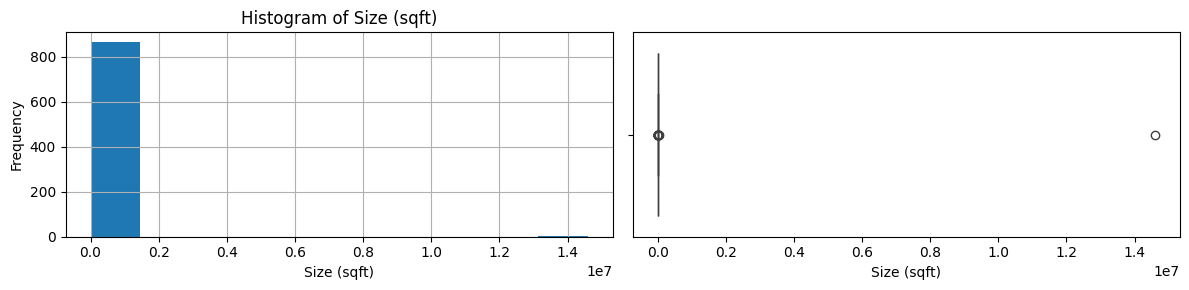

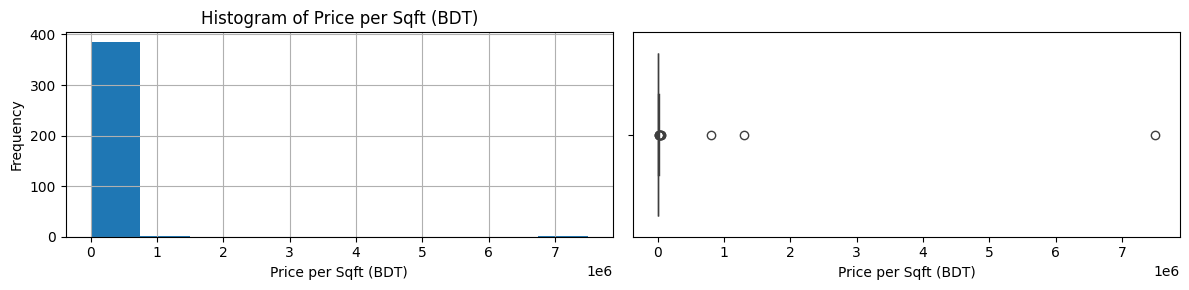

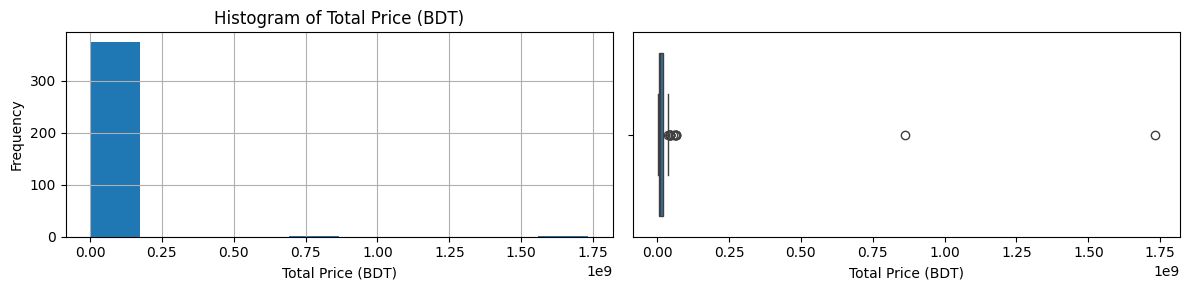

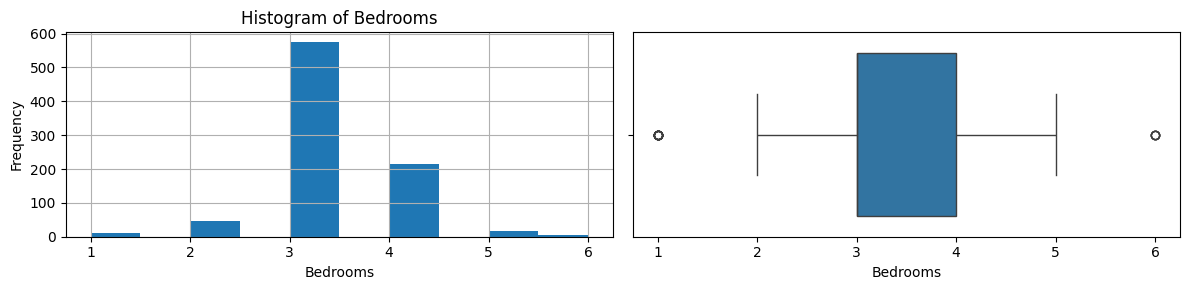

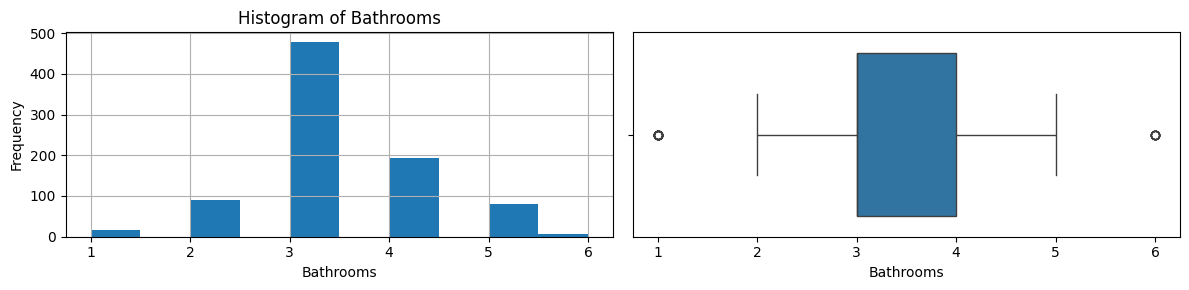

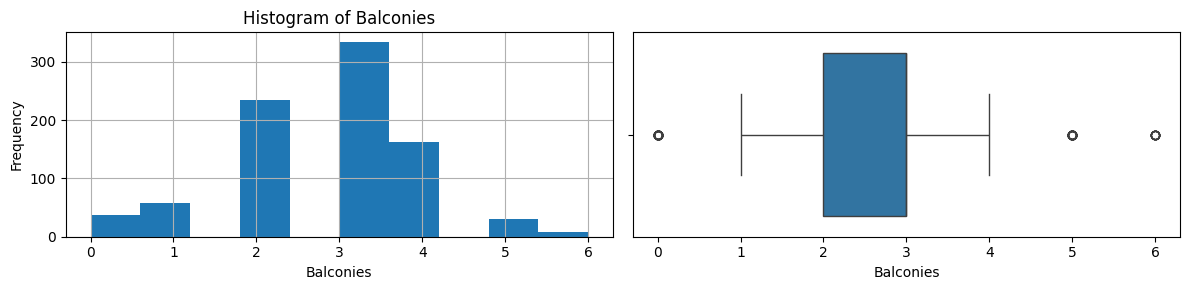

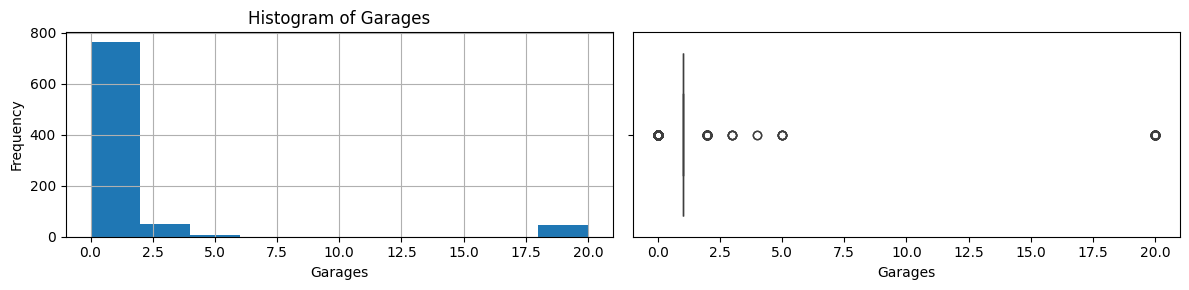

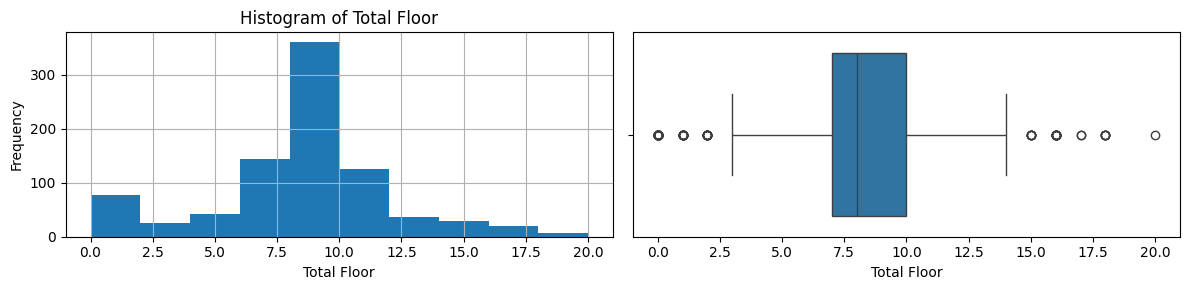

In [109]:
column_list=['Size (sqft)', 'Price per Sqft (BDT)', 'Total Price (BDT)','Bedrooms', 'Bathrooms', 'Balconies', 'Garages', 'Total Floor']
generate_plots(df, column_list)

In [110]:
df[df['Bathrooms'] > 5]

,Property Name,Promoted,Size (sqft),Price per Sqft (BDT),Total Price (BDT),Premium Project,Bedrooms,Bathrooms,Balconies,Garages,...,Security Alarm System,Pool,Garden,Lift,Hot water and heating,Guest Parking,Gas Connection,Self Water supply,Inter com,Fire exit
120,Dreamway Lucentia-Sky Villa (Luxury Duplex),0,4300,NaN,NaN,1,5,6,6,2,...,1,1,1,1,0,1,0,1,0,1
269,44 years old tinshed house in about 3 katha land.,0,1961,NaN,NaN,1,6,6,1,0,...,0,0,0,0,0,0,1,1,0,0
297,Navana Chez de Sofia,0,6152,NaN,NaN,1,5,6,6,1,...,1,1,1,1,1,1,1,1,1,1
407,Apartment for sale by owner at Mohammadpur.,0,4900,NaN,NaN,1,6,6,0,2,...,0,0,0,1,0,1,1,0,1,1
671,NaN,0,3000,NaN,NaN,1,6,6,6,1,...,0,0,0,0,0,0,0,0,0,0
720,Hotel West Valley Dhaka,0,6806,NaN,NaN,1,6,6,6,20,...,1,0,1,1,0,1,0,1,0,1
790,Jolshiri Abashon Flat,0,2900,NaN,NaN,0,5,6,5,1,...,1,1,1,1,0,1,0,1,0,1


In [111]:
df[df['Bedrooms'] > 5]

,Property Name,Promoted,Size (sqft),Price per Sqft (BDT),Total Price (BDT),Premium Project,Bedrooms,Bathrooms,Balconies,Garages,...,Security Alarm System,Pool,Garden,Lift,Hot water and heating,Guest Parking,Gas Connection,Self Water supply,Inter com,Fire exit
269,44 years old tinshed house in about 3 katha land.,0,1961,NaN,NaN,1,6,6,1,0,...,0,0,0,0,0,0,1,1,0,0
407,Apartment for sale by owner at Mohammadpur.,0,4900,NaN,NaN,1,6,6,0,2,...,0,0,0,1,0,1,1,0,1,1
671,NaN,0,3000,NaN,NaN,1,6,6,6,1,...,0,0,0,0,0,0,0,0,0,0
720,Hotel West Valley Dhaka,0,6806,NaN,NaN,1,6,6,6,20,...,1,0,1,1,0,1,0,1,0,1


In [114]:
df[df['Size (sqft)'] > 8000]

,Property Name,Promoted,Size (sqft),Price per Sqft (BDT),Total Price (BDT),Premium Project,Bedrooms,Bathrooms,Balconies,Garages,...,Security Alarm System,Pool,Garden,Lift,Hot water and heating,Guest Parking,Gas Connection,Self Water supply,Inter com,Fire exit
99,Barakah Yeada,0,9900,2380.0,24600000.0,1,3,4,5,1,...,0,1,1,1,0,0,0,1,0,1
334,ASSK AMARI New York City,0,24498,NaN,NaN,1,3,3,3,1,...,1,1,1,1,1,1,1,1,1,1
374,Sherin Palace,0,14601480,NaN,NaN,1,3,2,3,20,...,1,1,1,1,0,0,1,1,1,1
469,Luxurious OPL sky Garden 1310-2204 sft 1st Jan...,0,28000,NaN,NaN,1,3,3,2,1,...,1,1,1,1,0,1,0,1,0,1


In [124]:
# Finding Index of the Row where sqft is more than 10000
index_to_drop = df[df['Size (sqft)'] > 8000].index
print(index_to_drop)
df = df.drop(index_to_drop)

Index([99, 334, 374, 469], dtype='int64')


In [116]:
df[df['Price per Sqft (BDT)'] > 100000]

,Property Name,Promoted,Size (sqft),Price per Sqft (BDT),Total Price (BDT),Premium Project,Bedrooms,Bathrooms,Balconies,Garages,...,Security Alarm System,Pool,Garden,Lift,Hot water and heating,Guest Parking,Gas Connection,Self Water supply,Inter com,Fire exit
378,Titanium Garden Palace,0,1080,799000.0,8.629000e+08,1,3,3,2,4,...,0,0,0,1,0,0,0,1,0,1
708,Nandan aninda,0,1332,1300000.0,1.731600e+09,1,3,3,2,1,...,0,0,0,1,0,0,0,0,0,0
799,Basila,0,1420,7500000.0,NaN,0,3,3,4,1,...,1,1,1,1,0,1,0,1,0,1


In [117]:
index_to_drop = df[df['Price per Sqft (BDT)'] > 100000].index
df = df.drop(index_to_drop)

In [127]:
df[df['Total Price (BDT)'] > 50000000]

,Property Name,Promoted,Size (sqft),Price per Sqft (BDT),Total Price (BDT),Premium Project,Bedrooms,Bathrooms,Balconies,Garages,...,Security Alarm System,Pool,Garden,Lift,Hot water and heating,Guest Parking,Gas Connection,Self Water supply,Inter com,Fire exit
54,JBS AKEBONO,0,4200,15000.0,64400000.0,1,4,5,4,2,...,1,1,1,1,0,1,0,1,0,1
238,DDPL Royel Heritage,0,4360,13500.0,60900000.0,1,4,4,4,2,...,1,1,1,1,0,1,0,1,0,1
283,Shanta Nauratan,0,2506,25000.0,62700000.0,1,3,3,3,1,...,1,0,1,1,0,1,0,1,0,1
471,Al-Salam Real Estate,0,1445,45000.0,65200000.0,1,3,3,3,1,...,0,0,1,1,0,1,0,1,1,1
593,Green View,0,1300,50000.0,65000000.0,1,3,3,4,0,...,0,0,1,1,1,0,1,0,1,1
697,"Rupayan Lake Castle,",0,3030,17800.0,55100000.0,1,4,5,3,2,...,1,1,1,1,0,1,0,1,0,1


In [128]:
df[df['Total Floor'] > 18]

,Property Name,Promoted,Size (sqft),Price per Sqft (BDT),Total Price (BDT),Premium Project,Bedrooms,Bathrooms,Balconies,Garages,...,Security Alarm System,Pool,Garden,Lift,Hot water and heating,Guest Parking,Gas Connection,Self Water supply,Inter com,Fire exit
542,Dawan properties,0,1625,NaN,NaN,1,4,3,3,20,...,1,1,1,1,0,1,0,1,0,1


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 859 entries, 0 to 865
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Property Name          847 non-null    object 
 1   Promoted               859 non-null    int64  
 2   Size (sqft)            859 non-null    int64  
 3   Price per Sqft (BDT)   384 non-null    float64
 4   Total Price (BDT)      373 non-null    float64
 5   Premium Project        859 non-null    int64  
 6   Bedrooms               859 non-null    int64  
 7   Bathrooms              859 non-null    int64  
 8   Balconies              859 non-null    int64  
 9   Garages                859 non-null    int64  
 10  Facing                 779 non-null    object 
 11  Total Floor            859 non-null    int64  
 12  Furnishing             751 non-null    object 
 13  Construction Status    847 non-null    object 
 14  Owner                  858 non-null    object 
 15  Owner Type 

In [130]:
# final dataset with all district saving 
df.to_csv("E:/9_Tableau_Projects/5_Dhaka_apartment_price_analysis/datasets/apartment_listing_cleaned_final.csv", index=False)

In [132]:
# removing rows other than Dhaka district
df_dhaka = df[df['District'].str.lower() == 'dhaka']
df_dhaka.info()

<class 'pandas.core.frame.DataFrame'>
Index: 822 entries, 0 to 865
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Property Name          810 non-null    object 
 1   Promoted               822 non-null    int64  
 2   Size (sqft)            822 non-null    int64  
 3   Price per Sqft (BDT)   363 non-null    float64
 4   Total Price (BDT)      353 non-null    float64
 5   Premium Project        822 non-null    int64  
 6   Bedrooms               822 non-null    int64  
 7   Bathrooms              822 non-null    int64  
 8   Balconies              822 non-null    int64  
 9   Garages                822 non-null    int64  
 10  Facing                 746 non-null    object 
 11  Total Floor            822 non-null    int64  
 12  Furnishing             720 non-null    object 
 13  Construction Status    810 non-null    object 
 14  Owner                  821 non-null    object 
 15  Owner Type 

In [134]:
df_dhaka.to_csv("E:/9_Tableau_Projects/5_Dhaka_apartment_price_analysis/datasets/Dhaka_apartment_listing_final.csv", index=False)

## More Analysis

In [3]:
# Use encoding="utf-8-sig" to get bangla characters if they don't shows in df
df = pd.read_csv("E:/9_Tableau_Projects/5_Dhaka_apartment_price_analysis/datasets/Dhaka_apartment_listing_final.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Property Name          810 non-null    object 
 1   Promoted               822 non-null    int64  
 2   Size (sqft)            822 non-null    int64  
 3   Price per Sqft (BDT)   363 non-null    float64
 4   Total Price (BDT)      353 non-null    float64
 5   Premium Project        822 non-null    int64  
 6   Bedrooms               822 non-null    int64  
 7   Bathrooms              822 non-null    int64  
 8   Balconies              822 non-null    int64  
 9   Garages                822 non-null    int64  
 10  Facing                 746 non-null    object 
 11  Total Floor            822 non-null    int64  
 12  Furnishing             720 non-null    object 
 13  Construction Status    810 non-null    object 
 14  Owner                  821 non-null    object 
 15  Owner 

In [7]:
list(df.columns)

['Property Name',
 'Promoted',
 'Size (sqft)',
 'Price per Sqft (BDT)',
 'Total Price (BDT)',
 'Premium Project',
 'Bedrooms',
 'Bathrooms',
 'Balconies',
 'Garages',
 'Facing',
 'Total Floor',
 'Furnishing',
 'Construction Status',
 'Owner',
 'Owner Type',
 'Location',
 'District',
 'Link',
 'Listing Date',
 'WASA connection',
 'Generator',
 'Gymnasium',
 'CCTV',
 'Security Alarm System',
 'Pool',
 'Garden',
 'Lift',
 'Hot water and heating',
 'Guest Parking',
 'Gas Connection',
 'Self Water supply',
 'Inter com',
 'Fire exit']

In [4]:
for col in df.columns:
    print(f"\n🔹 Column: {col}")
    print(df[col].value_counts(dropna=False))


🔹 Column: Property Name
Property Name
NaN                           12
Pinaki North Ridge Heights     8
Anchor Real Estate Limited     6
MOONSCAPE                      5
Anchor Real Estate Ltd         4
                              ..
1550 sft used flat             1
Gloria                         1
Labiba House                   1
Navana Floras Bell             1
Hyperion Chayapallab           1
Name: count, Length: 727, dtype: int64

🔹 Column: Promoted
Promoted
0    761
1     61
Name: count, dtype: int64

🔹 Column: Size (sqft)
Size (sqft)
2850    36
1500    22
1200    21
1350    20
1850    20
        ..
1215     1
1639     1
1672     1
1440     1
2330     1
Name: count, Length: 352, dtype: int64

🔹 Column: Price per Sqft (BDT)
Price per Sqft (BDT)
NaN        459
7500.0      22
10000.0     21
6000.0      19
10500.0     17
          ... 
6700.0       1
7550.0       1
10800.0      1
8237.0       1
3000.0       1
Name: count, Length: 113, dtype: int64

🔹 Column: Total Price (BDT)
Total

In [14]:
filtered_df = df[(df['Fire exit'] == 1) & (df['Inter com'] == 1) & (df['Lift'] == 1) & (df['CCTV'] == 1) & (df['Gas Connection'] == 1)]
filtered_df[['WASA connection', 'Generator', 'Gymnasium',
 'CCTV', 'Security Alarm System', 'Pool', 'Garden', 'Lift', 'Hot water and heating', 'Guest Parking', 'Gas Connection',
 'Self Water supply', 'Inter com', 'Fire exit']]

,WASA connection,Generator,Gymnasium,CCTV,Security Alarm System,Pool,Garden,Lift,Hot water and heating,Guest Parking,Gas Connection,Self Water supply,Inter com,Fire exit
244,1,1,1,1,1,1,1,1,1,0,1,1,1,1
249,1,1,1,1,1,1,1,1,1,1,1,1,1,1
250,1,1,1,1,1,1,1,1,1,1,1,1,1,1
251,1,1,1,1,1,1,1,1,1,1,1,1,1,1
252,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,1,1,1,1,1,1,1,1,1,1,1,1,1,1
818,1,1,1,1,1,1,1,1,1,1,1,1,1,1
819,1,1,1,1,1,1,1,1,1,1,1,1,1,1
820,1,1,1,1,1,1,1,1,1,1,1,1,1,1


# Testing

In [97]:
# first testing
# df_test = df.copy(deep=True)
df_test = pd.read_csv("E:/9_Tableau_Projects/5_Dhaka_apartment_price_analysis/datasets/dhaka_cleaned_data_1.csv")
# df_test.head()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Feature                 866 non-null    int64  
 1   Size (sqft)             866 non-null    int64  
 2   Price per Sqft (BDT)    388 non-null    float64
 3   Total Price (BDT)       376 non-null    float64
 4   Premium Project         866 non-null    int64  
 5   Bedrooms                866 non-null    int64  
 6   Bathrooms               866 non-null    int64  
 7   Balconies               866 non-null    int64  
 8   Facing                  786 non-null    object 
 9   Listing Date            866 non-null    object 
 10  Title                   866 non-null    object 
 11  Link                    866 non-null    object 
 12  Address                 866 non-null    object 
 13  Owner                   865 non-null    object 
 14  Owner Type              866 non-null    ob

In [103]:
# Temporarily Show All Rows
# Set display option
pd.set_option('display.max_rows', None)       # Show all rows
pd.set_option('display.max_columns', None)    # Show all columns
pd.set_option('display.width', 200)           # Prevent column wrapping

# Show entire DataFrame
# value_counts = df['Location'].value_counts(dropna=False)
# print(value_counts)
print(df_test[["Property_features_dict"]])
# Reset After Viewing
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

                                Property_features_dict
0    {'Mosque/Prayer Room': 1, 'Security': 1, 'Lift...
1    {'Security': 1, 'Lift': 1, 'WASA connection': ...
2    {'Mosque/Prayer Room': 1, 'Security': 1, 'Lift...
3    {'Mosque/Prayer Room': 1, 'Security': 1, 'Lift...
4    {'Security': 1, 'Lift': 1, 'Fire exit': 1, 'WA...
5    {'Mosque/Prayer Room': 1, 'Security': 1, 'Lift...
6    {'Security': 1, 'Lift': 1, 'Fire exit': 1, 'WA...
7    {'Mosque/Prayer Room': 1, 'Security': 1, 'Lift...
8    {'Mosque/Prayer Room': 1, 'Security': 1, 'Lift...
9    {'Mosque/Prayer Room': 1, 'Security': 1, 'Lift...
10   {'Security': 1, 'Lift': 1, 'WASA connection': ...
11   {'Security': 1, 'Lift': 1, 'Fire exit': 1, 'Se...
12   {'Security': 1, 'Lift': 1, 'Fire exit': 1, 'El...
13   {'Mosque/Prayer Room': 1, 'Security': 1, 'Lift...
14   {'Lift': 1, 'WASA connection': 1, 'Hot water':...
15   {'Security': 1, 'Lift': 1, 'WASA connection': ...
16                                                  {}
17   {'Mos

In [63]:
df_test.columns

Index(['Feature', 'Size (sqft)', 'Price per Sqft (BDT)', 'Total Price (BDT)',
       'Premium Project', 'Bedrooms', 'Bathrooms', 'Listing Date', 'Title',
       'Link', 'Address', 'Owner', 'Owner Type', 'Property_summary_dict',
       'Property_features_dict'],
      dtype='object')

In [64]:
# drop multiple column
df_test = df_test.drop(['Feature', 'Size (sqft)', 'Price per Sqft (BDT)', 'Total Price (BDT)',
       'Premium Project', 'Bedrooms', 'Bathrooms', 'Listing Date', 'Title',
       'Link', 'Address', 'Owner', 'Owner Type',
       'Property_features_dict'], axis=1)
df_test.head()

,Property_summary_dict
0,{'Property Name': 'Anwar Landmark Hossain Hous...
1,"{'Property Name': ""Ryan's Salma Noor Palace"", ..."
2,{'Property Name': 'Apan Angina Rabia Rahman Ga...
3,"{'Property Name': 'Anwar Landmark Neelkantho',..."
4,"{'Property Name': 'Hyperion Chayapallab', 'Pro..."


In [66]:
print(df_test['Property_summary_dict'].apply(type).value_counts())

Property_summary_dict
<class 'str'>    866
Name: count, dtype: int64


In [ ]:
# dealing with stringified dictionaries, likely from a CSV or scraped source. You’ll want to safely convert each string to a real Python dictionary before accessing .keys().
# Convert Strings to Dictionaries
# - If it is, it parses the string into a dictionary using ast.literal_eval(x).
# - If it’s not a string (e.g., already a dict), it leaves it unchanged (else x).
# - The result is assigned back to the same column, replacing the original stringified dicts with real Python dictionaries.

# Use ast.literal_eval() — it safely parses strings that look like Python literals (like dicts):
#  ast.literal_eval() is safer than eval() — it only evaluates literals, not arbitrary code.

# What It Means: “It won’t execute arbitrary code”
# When we say ast.literal_eval() is secure, we mean:
# - It only parses basic Python literals — like dictionaries, lists, strings, numbers, booleans, and None.
# - It does not run functions, import modules, or execute any code that could harm your system.

# Arbitrary code means:
# Any code that someone chooses to run — regardless of what it does.

# It could be:
# - Harmless (e.g., 2 + 2)
# - Malicious (e.g., delete files, send data, install malware)
# - Unexpected (e.g., open a browser, modify system settings)
# If your program executes arbitrary code, it means it’s blindly trusting and running whatever it’s given — which is risky.

import ast

# df_test['Property_summary_dict'] = df_test['Property_summary_dict'].apply(
#     lambda x: ast.literal_eval(x) if isinstance(x, str) else x
# )

def safe_eval(x):
    try:
        return ast.literal_eval(x)
    except Exception as e:
        print(f"Failed to parse: {x}\nError: {e}")
        return {}

df_test['Property_summary_dict'] = df_test['Property_summary_dict'].apply(safe_eval)

In [72]:
# after running above code block, str changes to dict
print(df_test['Property_summary_dict'].apply(type).value_counts())

Property_summary_dict
<class 'dict'>    866
Name: count, dtype: int64


In [69]:
# adding new rows
# Step 1: Create a set of all unique keys across all rows
all_keys = set()
for row in df_test['Property_summary_dict']:
    all_keys.update(row.keys())

# Step 2: Add missing columns with default None
for key in all_keys:
    if key not in df_test.columns:
        df_test[key] = None

# Step 3: Fill in values from each dictionary
for idx, row_dict in df_test['Property_summary_dict'].items():
    for key, value in row_dict.items():
        df_test.at[idx, key] = value

In [70]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Property_summary_dict  866 non-null    object
 1   Floor Avaiable On      851 non-null    object
 2   Baths                  859 non-null    object
 3   Total Floor            816 non-null    object
 4   Property For           859 non-null    object
 5   Property Type          859 non-null    object
 6   Balconies              834 non-null    object
 7   Facing                 859 non-null    object
 8   Property Size          859 non-null    object
 9   Transaction Type       859 non-null    object
 10  Property Name          859 non-null    object
 11  Garages                859 non-null    object
 12  Land Area              859 non-null    object
 13  Construction Status    859 non-null    object
 14  Bedroom                859 non-null    object
 15  Furnishing             

In [71]:
df_test.head()

,Property_summary_dict,Floor Avaiable On,Baths,Total Floor,Property For,Property Type,Balconies,Facing,Property Size,Transaction Type,Property Name,Garages,Land Area,Construction Status,Bedroom,Furnishing,Location
0,{'Property Name': 'Anwar Landmark Hossain Hous...,"1st Floor, 2nd Floor",03,14,Sale,Apartment/Flats,3,North Facing,1800 sqft,New,Anwar Landmark Hossain Housing,Parking 1,N/A,Under Construction,03,Unfurnished,"Shyamoli , Dhaka"
1,"{'Property Name': 'Ryan's Salma Noor Palace', ...","4th Floor, 6th Floor, 8th Floor, 9th Floor, An...",03,10,Sale,Apartment/Flats,3,East Facing,1696 sqft,New,Ryan's Salma Noor Palace,Parking 20,10 katha,Under Construction,03,Unfurnished,"Uttara , Dhaka"
2,{'Property Name': 'Apan Angina Rabia Rahman Ga...,"4th Floor, 5th Floor",04,10,Sale,Apartment/Flats,4,South Facing,1691 sqft,New,Apan Angina Rabia Rahman Garden,Parking 1,6 katha,Under Construction,03,N/A,"Shantinagar , Dhaka"
3,"{'Property Name': 'Anwar Landmark Neelkantho',...",Any Floor,03,13,Sale,Apartment/Flats,3,South Facing,2150 sqft,New,Anwar Landmark Neelkantho,Parking 1,23 katha,Under Construction,03,Unfurnished,"Mirpur DOHS , Dhaka"
4,"{'Property Name': 'Hyperion Chayapallab', 'Pro...","4th Floor, 6th Floor",04,None,Sale,Apartment/Flats,3,N/A,2000 sqft,New,Hyperion Chayapallab,Parking 1,N/A,Under Construction,04,Unfurnished,"Pallabi , Dhaka"


In [58]:
# Temporarily Show All Rows
# Set display option
pd.set_option('display.max_rows', None)
# Show entire DataFrame
print(df[["Property_summary_dict"]])
# Reset After Viewing
pd.reset_option('display.max_rows')

                                 Property_summary_dict
0    {'Property Name': 'Anwar Landmark Hossain Hous...
1    {'Property Name': "Ryan's Salma Noor Palace", ...
2    {'Property Name': 'Apan Angina Rabia Rahman Ga...
3    {'Property Name': 'Anwar Landmark Neelkantho',...
4    {'Property Name': 'Hyperion Chayapallab', 'Pro...
5    {'Property Name': 'Luxurious Apartment Sale at...
6    {'Property Name': 'Anwar Landmark Salahuddin G...
7    {'Property Name': 'Unique Laurel', 'Property T...
8    {'Property Name': 'Somerset Dream Square', 'Pr...
9    {'Property Name': 'SUNNY VILLA', 'Property Typ...
10   {'Property Name': 'SOUTH GARDEN', 'Property Ty...
11   {'Property Name': 'MARC Subh-E-Sadiq', 'Proper...
12   {'Property Name': 'Al ali garden', 'Property T...
13   {'Property Name': 'Pinaki North Ridge Heights'...
14   {'Property Name': 'RYAN ATAB SOUTH PARK', 'Pro...
15   {'Property Name': 'Ready Flat For Sale @Mirpur...
16                                                  {}
17   {'Pro

In [32]:
value = df_copy.loc[5, "Property_summary_dict"]  # if index is labeled as 5
# or
# value = df.iloc[5]["Price per Sqft"]  # if you mean the 6th row by position
value

"{'Property Name': 'Luxurious Apartment Sale at Lalmatia', 'Property Type': 'Apartment/Flats', 'Property For': 'Sale', 'Location': 'Lalmatia , Dhaka', 'Construction Status': 'Ready', 'Property Size': '1560 sqft', 'Transaction Type': 'New', 'Floor Avaiable On': '2nd Floor, 5th Floor', 'Bedroom': '03', 'Baths': '03', 'Balconies': '3', 'Garages': 'Parking 1', 'Total Floor': '8', 'Furnishing': 'Furnished', 'Facing': 'West Facing', 'Land Area': '8 katha'}"

In [59]:
print(df[["Property_summary_dict"]])

                                 Property_summary_dict
0    {'Property Name': 'Anwar Landmark Hossain Hous...
1    {'Property Name': "Ryan's Salma Noor Palace", ...
2    {'Property Name': 'Apan Angina Rabia Rahman Ga...
3    {'Property Name': 'Anwar Landmark Neelkantho',...
4    {'Property Name': 'Hyperion Chayapallab', 'Pro...
..                                                 ...
861  {'Property Name': 'Navana Dew Drops', 'Propert...
862  {'Property Name': 'Navana White Stone', 'Prope...
863  {'Property Name': 'Navana Esilmon Palace', 'Pr...
864  {'Property Name': 'Navana Oakvale', 'Property ...
865  {'Property Name': 'Navana Silverwood', 'Proper...

[866 rows x 1 columns]
